# Introduction

Afin de connaître le trafic qui s’écoule sur le réseau routier de la DIR Med, tout un système de recueil de données est mis en œuvre. Ce système de recueil de données de trafic se compose de stations permanentes (boucles de comptages) et de capteurs installés de façon permanente. Ils permettent notamment de connaître le débit (le nombre de véhicules par minutes) qui passe quotidiennement sur le réseau et la vitesse.

Dans l’ensemble de données de trafic sur les autoroutes de l’aire métropole Aix-Marseille-Provence des mesures réalisées par tranche d’une heure sur les stations de comptages ont été utilisées sur une période de 9 mois et des mesures réalisées par tranche de 6 minutes : de Janvier a Mai 2016.

Les données de comptages se composent des débits horaire (Q), taux d’occupation (To) et vitesses des véhicules passant au niveau de la station de comptage dans un sens donné, puis date et jours sur l’ensemble des jours de l’année 2016. Les données sont représentées sous forme plusieurs tables, chaque table contient les données d'un jour.

Voici le lien vers les données utilisées de Trafic/Comptage : https://github.com/Oumayma13/Comptage

ou bien

https://drive.google.com/drive/folders/1YiAVt6uI4ikUgwEuqTPmnjnSxWHvuOq9?usp=sharing

Donc ce rapport les traitements sont réalisés sur les données suivantes :

Les données Q, T, V 6 minutes sur jours ouvrés.

Les données horaires sur l’ensemble des jours de l’année.

# Les données de comptages :
## Le recueil de données :

La présente étude concerne un réseau géré par la DIRMED (Direction Interdépartementale Des Routes Méditerranée) et les données concernées ont été recueillies, par le système SIREDO (Système Informatisé de Recueil de Données), dans 6 autoroutes :

**A51** : Aix-en-Provence – Marseille, depuis l’extrémité de la partie concédée de **A51** au nord jusqu’à l’échangeur d’extrémité de A7 à Marseille au sud (autoroutes **A7**, **A51** et la RN296) .

**A50** :  Aubagne – Marseille, s’appuyant sur la partie non concédée de l’autoroute A50 et les bretelles autoroutières de contournement d’Aubagne **(A501, A502).**

**A55** : Martigues – Marseille, depuis le franchissement du viaduc deCaronte à Martigues jusqu’à la
jonction avec la bretelle
autoroutière A557 à Marseille
(autoroute A55).

Et 2 routes nationales:

**N113** : relie Marseille à Bordeaux - 660 km.

**N568** : relie la N113 à A55 - 35 km.

**L'axe A7 de Marseille à Vitrolles - 26.7 km :**
Vitrolles – Marseille, depuis l’extrémité de la partie concédée de A7 au nord jusqu’à l’autoroute A51 au sud (autoroute A7).

Les stations dans l'antoroutes A7 sont:

M7i; M7I; M7j; M7J; M7N; M7n; M7O; M7o; M7P; M7p; M7Q; M7q; M7R; M7r; M7S; M7s; M7T; M7t; M7U; M7u; M7V; M8A; M8a; M8B; M8b; M8C; m8D; M8d; M8D; M8e; M8E; M8F; M8g; M8G; M8h; M8H; M8I; M8i; M8j; M8J; M8k; M8K; M8n; M8N; M8o; M8O; M8P; M8Q; M8R; M8S.


## Formats de données :

L’identité de la station est représentée par un code SIREDO, par lequel nous pouvons connaitre la position d’une station SIREDO.

(Lien vers la liste des stations avec les localisations: https://drive.google.com/drive/folders/1YiAVt6uI4ikUgwEuqTPmnjnSxWHvuOq9 )

Une valeur de comptage est une valeur numérique, et les fichiers de données de comptage routier comporte des informations principales présentes dans une station :

-données de comptages : débits, vitesses, taux d’occupation.

-Le type de données compté : débit tous véhicules, poids lourds…(classe de véhicule).

-Un identifiant permettant la localisation de la donnée (Code de station, Pr : Point de Repère).

-La date et l’heure du comptage.

-Le nombre d'accidents horaire.

-La qualité de la mesure (OK = ' ' et Douteux = '?').

Les stations SIREDO permettent de recueillir des données par classe de véhicules, et par conséquents, les données débit Q et vitesses classifiées sont comptés par 6 types de véhicules, et sont indiqués dans les champs des tables par (Qi avec i= 1 à 6) et (Vi avec i= 1 à 6).

**Remarque :** On prend dans ce qui va suivre Q le trafic total Q = Q1 + ... + Q6, et la vitesse V2 de la classes 2 pour l'analyse de ces données.

<img src="tostation-ConvertImage.png">

# Organisation de données de comptages agrégées à l’heure :
## Création de la table de données de l’année 2016 :

Nous souhaitons concaténer les tables jour à fin d’avoir une table ‘dataframe’ contenant les données de toutes les autoroutes de l’aire métropole Aix-Marseille-Provence. Elles sont représentées sous forme plusieurs tables, chaque table contient les données d’un jour. Nous souhaitons concaténer les tables à fin d’avoir une table ‘dataframe’ contenant les données de toutes les autoroutes de l’aire métropole Aix-Marseille-Provence. Création de la table principale de l’année 2016 :

Dans le but de créer la table ‘table_2016’ nous allons tout d’abords regrouper les tables de jours nommées ’0i.dat’ dans une table de mois, et après on regroupe les tables mois dans table_2016. En exécutant le code suivant, on crée la table des données du mois de janvier, sans oublier d’indiquer le chemin des données sur la machine après les avoir télécharger.

In [ ]:
#Verifier le chemin et importer les packages.
pwd
#Chemin
cd &path

In [96]:
#Charger les biblio
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import numpy as np
import string
from subprocess import check_output
import seaborn as sns
from pylab import *
%matplotlib inline

In [ ]:
#Creation de la table du mois janvier 2016.
table_01_16 = pd.concat([pd.read_csv('01.dat', header=None, sep=';', engine='python'),
                pd.read_csv('02.dat', header=None, sep=';', engine='python'),
                pd.read_csv('03.dat', header=None, sep=';', engine='python'),
                pd.read_csv('04.dat', header=None, sep=';', engine='python'),
                pd.read_csv('05.dat', header=None, sep=';', engine='python'),
                pd.read_csv('06.dat', header=None, sep=';', engine='python'),
                pd.read_csv('07.dat', header=None, sep=';', engine='python'),
                pd.read_csv('08.dat', header=None, sep=';', engine='python'),
                pd.read_csv('09.dat', header=None, sep=';', engine='python'),
                pd.read_csv('10.dat', header=None, sep=';', engine='python'),
                pd.read_csv('11.dat', header=None, sep=';', engine='python'),
                pd.read_csv('12.dat', header=None, sep=';', engine='python'),
                pd.read_csv('13.dat', header=None, sep=';', engine='python'),
                pd.read_csv('14.dat', header=None, sep=';', engine='python'),
                pd.read_csv('15.dat', header=None, sep=';', engine='python'),
                pd.read_csv('16.dat', header=None, sep=';', engine='python'),
                pd.read_csv('17.dat', header=None, sep=';', engine='python'),
                pd.read_csv('18.dat', header=None, sep=';', engine='python'),
                pd.read_csv('19.dat', header=None, sep=';', engine='python'),
                pd.read_csv('20.dat', header=None, sep=';', engine='python'),
                pd.read_csv('21.dat', header=None, sep=';', engine='python'),
                pd.read_csv('22.dat', header=None, sep=';', engine='python'),
                pd.read_csv('23.dat', header=None, sep=';', engine='python'),
                pd.read_csv('24.dat', header=None, sep=';', engine='python'),
                pd.read_csv('25.dat', header=None, sep=';', engine='python'),
                pd.read_csv('26.dat', header=None, sep=';', engine='python'),
                pd.read_csv('27.dat', header=None, sep=';', engine='python'),
                pd.read_csv('28.dat', header=None, sep=';', engine='python'),
                pd.read_csv('29.dat', header=None, sep=';', engine='python'),
                pd.read_csv('30.dat', header=None, sep=';', engine='python'),
                pd.read_csv('31.dat', header=None, sep=';', engine='python')]) 
#transformer la table en dataframe
table_01_2016 = pd.DataFrame(table_01_16)
#Exporter la table
table_01_2016.to_csv('table_01_2016.csv', index = False, encoding = 'utf-8')

A fin de créer la table ‘table_2016’ nous allons tout d’abords regrouper les tables de jours nommées ’0i.dat’ dans une table de mois, et après on regroupe les tables mois dans table_2016, en effectuant le code suivant :
On refait le code ci-dessus pour toutes les autres tables, jusqu'au mois d'octobre, vu que les tables du mois de novembre et décembre.
Voici le lien vers les tables de données de janvier jusqu'à septembre 2016 : 
https://drive.google.com/drive/folders/1Z3MFMvPBtjWzgTjDra2VNLwL7u262uYx

En appliquant le code suivant, on obtient la table ‘table_2016’ :

In [ ]:
table_2016 = pd.concat([table_01_2016, table_02_2016, table_03_2016, table_04_2016, table_05_2016, table_06_2016,
                       table_07_2016, table_08_2016, table_09_2016])

 ###### Remarque : 
Vous trouverez la table des données dans le même lien au-dessus.  

Après avoir importer la table, nous pouvons renommer les colonnes facilement sur Excel et supprimer les colonnes vides comme on supprime aussi les vitesses et on garde que la vitesse de la 2eme classe de véhicules car elle contient le plus de valeurs. 


In [97]:
#Importation de la table
table_2016 = pd.read_csv("table_2016.csv", sep = ';')
#Lire la table en dataframe
table_2016 = pd.DataFrame(table_2016)
table_2016.head()

,rgs,pr,m,js,jjmmaa,hhmm,Q1,Q2,Q3,Q4,Q5,Q6,Vitesse,To,Qualite
0,101#M1a,0,430,Ve,01/01/2016,00:00,11,403,5,0.0,0.0,2.0,92.0,1.0,?
1,102#M1b,1,9,Ve,01/01/2016,00:00,51,778,4,0.0,0.0,2.0,92.0,3.0,
2,103#M1c,1,508,Ve,01/01/2016,00:00,0,0,0,0.0,0.0,0.0,0.0,0.0,
3,104#M1d,2,30,Ve,01/01/2016,00:00,27,759,3,0.0,0.0,3.0,92.0,3.0,
4,105#M1e,2,462,Ve,01/01/2016,00:00,41,794,4,0.0,0.0,3.0,91.0,3.0,


In [99]:
# J'ai copié la table pour la modifier et garder la table initiale
dff = table_2016.copy()
#La colonne débit Q contient le débit toutes les classes de véhicules
dff['Q'] = table_2016['Q1'] + table_2016['Q2'] +table_2016['Q3'] +table_2016['Q4'] +table_2016['Q5'] +table_2016['Q6'] 
#Supprimer les colonnes Qi
lst = ['Q1','Q2','Q3','Q4','Q5','Q6']
dff = dff.drop(lst, 1,errors='ignore')
rgs = dff.rgs
#On separe la colonne rgs pour pouvoir lire le code de la station
#Cela aide a utiliser la fonction startswith
dff['A'], dff['Code'] = dff['rgs'].str.split('#', 1).str
dff.head()

,rgs,pr,m,js,jjmmaa,hhmm,Vitesse,To,Qualite,Q,A,Code
0,101#M1a,0,430,Ve,01/01/2016,00:00,92.0,1.0,?,421.0,101,M1a
1,102#M1b,1,9,Ve,01/01/2016,00:00,92.0,3.0,,835.0,102,M1b
2,103#M1c,1,508,Ve,01/01/2016,00:00,0.0,0.0,,0.0,103,M1c
3,104#M1d,2,30,Ve,01/01/2016,00:00,92.0,3.0,,792.0,104,M1d
4,105#M1e,2,462,Ve,01/01/2016,00:00,91.0,3.0,,842.0,105,M1e


### Les données de trafic sur l'autoroute A7 :
Le code de toutes les stations dans l'autoroute A7 commence par 'M7' et 'M8', donc nous gardons dans la table 'df' ques les stations de A7.

In [100]:
#Selectionner les codes qui commence par M7 et M8
df1 = dff[dff['Code'].str.startswith('M8')]
df2 = dff[dff['Code'].str.startswith('M7')]
#Concatener les deux tables
df3 = pd.concat([df2,df1],axis = 0,ignore_index = True)
df3.head()

,rgs,pr,m,js,jjmmaa,hhmm,Vitesse,To,Qualite,Q,A,Code
0,709#M7i,264,687,Ve,01/01/2016,00:00,98.0,2.0,,487.0,709,M7i
1,710#M7j,265,320,Ve,01/01/2016,00:00,96.0,1.0,,277.0,710,M7j
2,713#M7n,267,230,Ve,01/01/2016,00:00,0.0,0.0,,0.0,713,M7n
3,715#M7o,267,861,Ve,01/01/2016,00:00,110.0,1.0,,327.0,715,M7o
4,716#M7p,268,288,Ve,01/01/2016,00:00,0.0,0.0,,0.0,716,M7p


Voici le lien vers la table A7 sous le nom de table_A7_2016 : https://drive.google.com/drive/folders/1Z3MFMvPBtjWzgTjDra2VNLwL7u262uYx

Pour exporter la table il suffit d'exécuter la commande suivante :

In [6]:
#Exporter la table
df.to_csv('table_A7_2016.csv', index = False, encoding = 'utf-8')

NameError: name 'df' is not defined

# Qualification des données
La qualité de ces données est évaluée suite à l’application de plusieurs tests élémentaires permettant de vérifier la cohérence des 3 données mesurées par chaque point de mesure.Il s’agit des tests suivants :
- Données manquantes. 
- Sur-comptage/ Sur-vitesse.
- Q/V/To nul.
- Débit et Vitesse incompatibles.
- Débit et TO incompatibles.

Nous allons faire une qualification des données pour chaque point de mesures qui représente une station.

## Les données manquantes  :
 Les données manquantes correspondent aux données non présentes ou « vides » ou bien les données marquées d’un indice de qualité mauvais, c’est à dire les données dont la mesure qualité indique ‘ ? ’. 

##### Remarque :
Dès qu’une des 3 valeurs (Q, V ou TO) est manquante, la mesure complète est considérée manquante, donc on élimine toute la mesure.

On cherche les valeurs manquantes dans l'ensemble des données d'A7. La commande suivante montre qu'elles ne contiennent aucune donnée manquante, et par conséquent il n y en a aucune dans les points de mesures concernés.

In [7]:
df3.isnull().any()

rgs        False
pr         False
m          False
js         False
jjmmaa     False
hhmm       False
Vitesse    False
To         False
Qualite    False
Q          False
A          False
Code       False
dtype: bool

## Valeur aberrante et nulle :
**Valeurs extrêmes :**

Une valeur aberrante est une valeur qui s'écarte fortement des valeurs des autres observations, anormalement faible ou élevée. Les valeurs aberrantes peuvent avoir un effet disproportionné sur les résultats statistiques, tels que la moyenne, ce qui peut conduire à des interprétations trompeuses. Et c’est souvent à cause des erreurs de saisie de données ou bien un problème lié au procédé.
la couverture en terme de capteurs est rarement totale sur le réseau et les mesures peuvent comporter des erreurs ou être indisponibles dans le cas de panne de capteur. /*Le recueil des données brutes fournit par conséquent empreinte
d’erreurs*/. C’est la raison pour laquelle des méthodes de qualiﬁcation (=identiﬁcation) des données aberrantes et de reconstitution des données manquantes sont développées, ces méthodes donnent comme résultat les tests suivants:
- Le test de sur-comptage est effectué en comparant chaque débit mesuré à un seuil de débit : à priori 6000 véh./heure.

- Le test de sur-vitesse, est effectué en comparant chaque vitesse mesurée à une vitesse limite : à priori 160 km/h.

- Le test du taux d'occupation (To), est effectuée en identifiant les valeurs nulles ou supérieures à la 100%.

**Valeurs nulles:**

Lorsque le débit ou la vitesse est nul ou encore le To la voie est vide. Donc une heure sans donnée, revient à dire que la voie est vide cette heure ci.

**Utilisation de graphiques pour identifier des valeurs aberrantes :**
 
Nous pouvons aussi trouver les derniers résultats des sur-comptage et sur-vitesse en identifiant les valeurs aberrantes par des graphes :
Sur les nuages de points, les points très éloignés des autres sont de possibles valeurs aberrantes. 
En effectuant la commande suivant, on obtient un graphe de nuage :

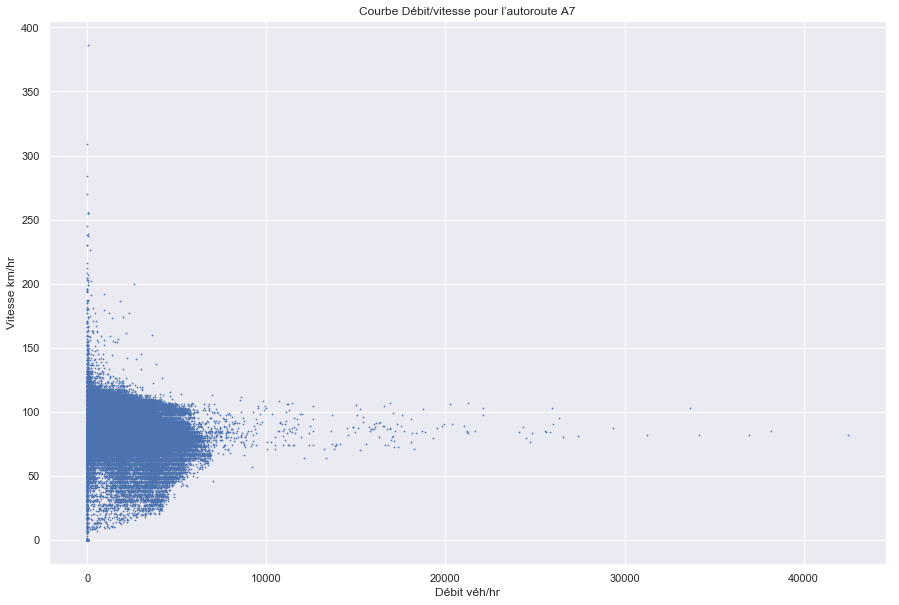

In [101]:
sns.set()
plt.figure(figsize=(15,10))
plt.scatter(df3.Q, df3.Vitesse, s =.5)
plt.title('Courbe Débit/vitesse pour l’autoroute A7')
plt.xlabel('Débit véh/hr')
plt.ylabel('Vitesse km/hr')
plt.show()

Ce nuage de points met en évidence des valeurs aberrantes, les points très éloignés des autres sont supérieur 
que 6000 pour le débit et 150 pour la vitesse. Ce qui confirme /*le résultat dernier*/.
 
En général, les valeurs aberrantes sont plus faciles à repérer sur une boîte à moustaches. Elles sont des valeurs de données très éloignées des autres valeurs de données, et peuvent avoir une incidence importante sur vos résultats.


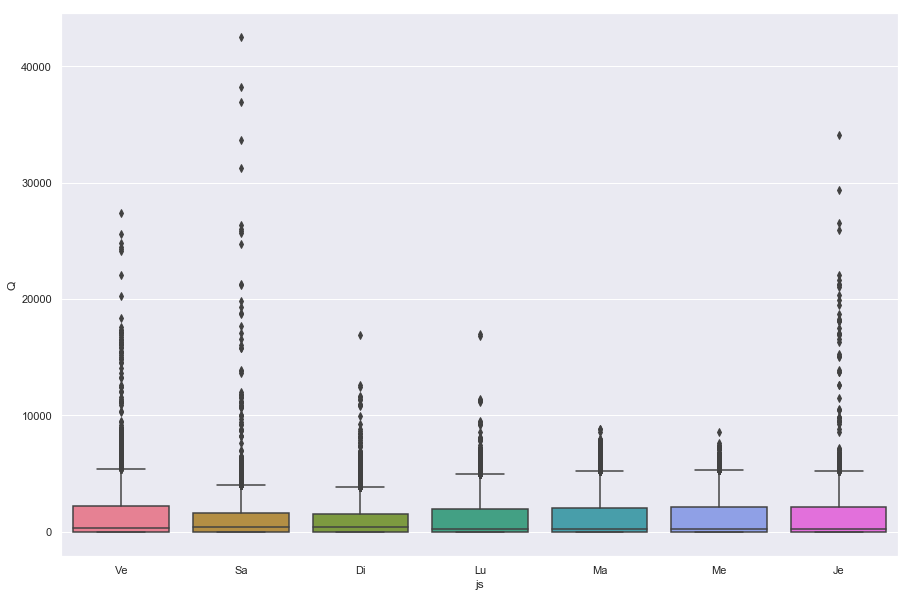

In [7]:
plt.figure(figsize=(15, 10))
sns.boxplot(x= 'js' , y='Q', data = df3, palette = 'husl')

 Pour la suite nous allons traiter les données aberrantes de chaques stations, et pour cela on commence par les identifier.

**Débit et Vitesse incompatibles :**

Le test débit / Vitesse incompatibles est effectué en recensant les cas où :
- Q > 0 et V = 0, ou bien
- Q = 0 et V > 0.

**Débit et TO incompatibles :**

Le test débit TO incompatibles est effectué en recensant les cas où :
- Q > seuil_min et TO = 0%.
Avec seuil_min = 35 véh./6minutes/voie = 350 véh./heure/voie.

Pour la suite nous allons traiter les données aberrantes de chaques stations, et pour cela on commence par les identifier.

In [8]:
#Identifier les donnees de chaque stations
grouped = df3.groupby('Code')
#for name,group in grouped:
    #print (name)
    #name = grouped.get_group('name')
    #print (group)

In [9]:
#La fonction utilisée pour calculer les pourcentages des donnees aberrantes 
def PRC(b):
    l = len(M7i) - len(b)
    return (l*100)/ len(M7i)

### Point de mesures : 813#M8m

In [10]:
# Identifier les valeurs aberrantes dans les tables des stations a la fois
#liste = ['M7I', 'M7J', 'M7N', 'M7O', 'M7P', 'M7Q', 'M7R', 'M7S', 'M7T', 'M7U', 'M7V', 'M7i', 'M7j', 'M7n', 'M7o', 'M7p', 'M7q', 'M7r', 'M7s', 'M7t',
         #'M7u', 'M8A', 'M8B', 'M8C', 'M8D', 'M8E', 'M8F', 'M8G', 'M8H', 'M8I', 'M8J', 'M8K', 'M8L', 'M8M', 'M8N', 'M8O', 'M8P', 'M8Q', 'M8R', 'M8S',
         #'M8a', 'M8b', 'M8c', 'M8d', 'M8e', 'M8f', 'M8g', 'M8h', 'M8i', 'M8j', 'M8k', 'M8l','M8m' ,'M8n' ,'M8o' ,'M8p' ,'M8r' ,'M8s']
liste = ['M8m','M7i','M7j','M7n', 'M7o','M7p']
for station in liste:
station = grouped.get_group('station')

IndentationError: expected an indented block (<ipython-input-10-d5c09aaef9a0>, line 7)

In [11]:
#Table de donnees de la station M8m
M8m = grouped.get_group('M8m')
M8m.head()

,rgs,pr,m,js,jjmmaa,hhmm,Vitesse,To,Qualite,Q,A,Code
94491,813#M8m,278,360,Ve,01/01/2016,00:00,0.0,0.0,,0.0,813,M8m
94528,813#M8m,278,360,Ve,01/01/2016,01:00,0.0,0.0,,0.0,813,M8m
94565,813#M8m,278,360,Ve,01/01/2016,02:00,0.0,0.0,,0.0,813,M8m
94602,813#M8m,278,360,Ve,01/01/2016,03:00,0.0,0.0,,0.0,813,M8m
94639,813#M8m,278,360,Ve,01/01/2016,04:00,0.0,0.0,,0.0,813,M8m


Donc la station M8m ne contient que des valeurs nulles dans les champs: Vitesse, Q, To.
Dans ce chapitre on prendra comme exemple les deux points de mesures suivants : 709#M7i et 811#M8k.
    
### Point de mesures : 709#M7i

- Coordonnées: 587097.071071 ; 5369193.042693
- Axe: A7
- Sens: Marseille->Lyon
- PR: 264+687
- Long: représentée 5,262 km
- Nombre de voies: 2
- Nombre de capteurs: 3
- Largeur par voie: 3,5m
- Présence BAU :oui.

**Valeurs extrêmes et nulles :**

Pour commencer nous allons tout d’abord identifier les données de chaque station, puis récupérer et compter les données qui vérifient :  

•	Débit horaire <= 6000 véh/hr.

•	Vitesse horaire <= 160 km/hr.

•	To <= 100%.

In [14]:
#Table de donnees de la station M7i
M7i = grouped.get_group('M7i')
#transformer la table en dataframe
M7i = pd.DataFrame(M7i)
M7i.describe()

,pr,m,Vitesse,To,Q
count,4499.0,4499.0,4499.000000,4499.000000,4499.000000
mean,264.0,687.0,83.530562,12.369638,1943.087575
std,0.0,0.0,21.857091,12.463145,1458.774696
min,264.0,687.0,0.000000,0.000000,0.000000
25%,264.0,687.0,82.000000,2.000000,570.500000
50%,264.0,687.0,91.000000,8.000000,1714.000000
75%,264.0,687.0,96.000000,19.000000,3198.500000
max,264.0,687.0,106.000000,135.000000,16597.000000


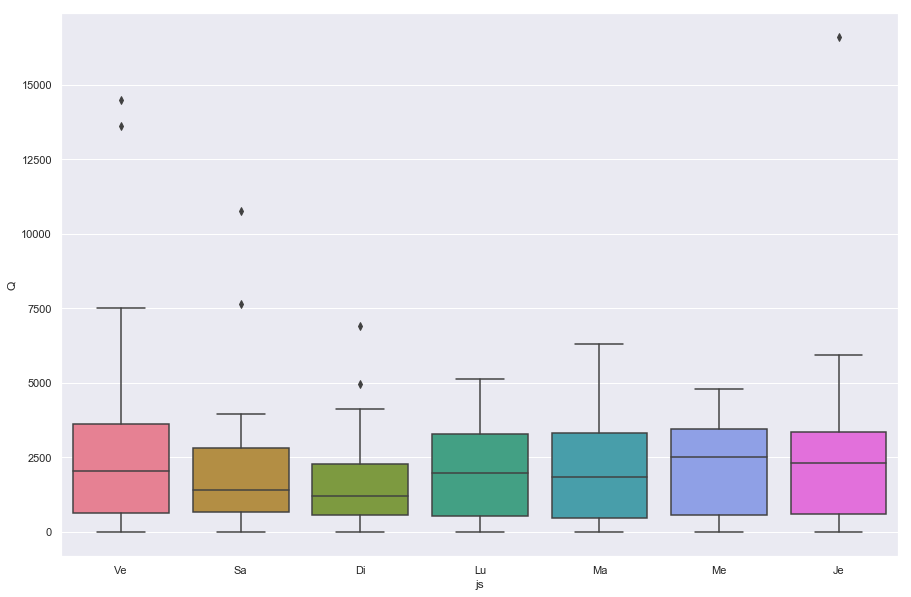

In [15]:
plt.figure(figsize=(15, 10))
sns.boxplot( x= 'js' , y='Q', data = M7i, palette = 'husl')

In [16]:
### Débit horaire
selection = (M7i['Q'] <= 6000)
q = M7i[selection]
PRC(q)

0.24449877750611246

In [17]:
### Vitesse horaire
selection = (M7i['Vitesse'] <= 160)
v = M7i[selection]
PRC(v) 

0.0

In [18]:
### To horaire
selection = (M7i['To'] <= 100)
t = M7i[selection]
PRC(t) 

0.04445432318292954

##### Résultat :
la part des valeurs aberrantes sont les suivantes:

Débit horaire: **0,24%** ; Vitesse horaire: **0%** ; To horaire: **0,04%**

 **Remarque :**
Lorsque le débit ou la vitesse est nul ou encore le To la voie est vide. Donc une heure sans donnée, revient à dire que la voie est vide cette heure ci.

In [19]:
### Débit et TO incompatibles
selection =  (M7i['Q'] > 50)
qq = M7i[selection]
PRC(qq)

4.778839742164926

In [20]:
### Vitesse horaire
selection = (M7i['Vitesse'] > 5)
vv = M7i[selection]
PRC(vv)

4.512113803067348

In [21]:
### To horaire
selection = (M7i['To'] > 0)
tt = M7i[selection]
PRC(tt)

6.579239831073572

##### Résultat :
La part des valeurs extrêmes sont les suivantes:


| **Champs** | **D.extremes**   |
|------|------|
|   **Debit Q** | **4.78%**|
|------|------|
|   **Vitesse**  | **4.57%**|
|------|------|
|   **To**  | **6.58%**|

Les données disqualifiées sont corrigées afin de garantir une continuité des valeurs et des indicateurs complets dans la mesure du possible.

In [22]:
# Transformer les donnees a des dataframe
lst = [q,v,t,qq,vv,tt]
for i in lst :
    i = pd.DataFrame(i)

In [23]:
# Eliminer les valeurs aberrantes
inter1 = pd.merge(q, v, how='inner')
inter2 = pd.merge(t, qq, how='inner')
inter3 = pd.merge(vv, tt, how='inner')
inter4 = pd.merge(inter1, inter2, how='inner')
tab_M7i = pd.merge(inter3, inter4, how='inner')


La table M7i après le nettoyage de données: 

In [24]:
# La table M7i après les reconstitutions
tab_M7i.describe()

,pr,m,Vitesse,To,Q
count,4192.0,4192.0,4192.000000,4192.000000,4192.000000
mean,264.0,687.0,87.361164,13.112357,2057.757395
std,0.0,0.0,12.261635,12.080262,1355.054191
min,264.0,687.0,17.000000,1.000000,164.000000
25%,264.0,687.0,84.000000,3.000000,727.250000
50%,264.0,687.0,91.000000,10.000000,1915.000000
75%,264.0,687.0,96.000000,19.000000,3246.250000
max,264.0,687.0,105.000000,63.000000,5981.000000


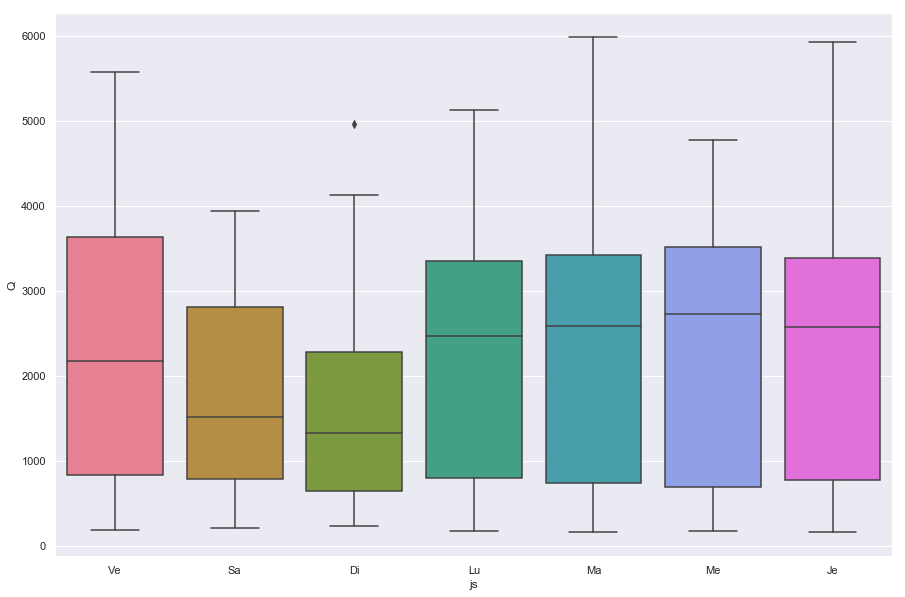

In [25]:
plt.figure(figsize=(15, 10)) 
sns.boxplot(x= 'js' , y='Q', data = tab_M7i, palette = 'husl')

### Point de mesures : 811#M8k

- Coordonnées: 597278.1656 ; 5359050.2415
- Axe: A7
- Sens: Marseille->Lyon
- PR: 277+278
- Long: représentée 1,621 km
- Nombre de voies: 3
- Nombre de capteurs: 3
- Largeur par voie: 3,5m
- Présence BAU: oui
Identifier la table des donnees du point de mesures 811#M8k


In [26]:
#Table de donnees de la station M8k
M8k = grouped.get_group('M8k')
#transformer la table en dataframe
M8k = pd.DataFrame(M8k)
M8k.describe()

,pr,m,Vitesse,To,Q
count,4499.0,4499.0,4499.000000,4499.000000,4499.000000
mean,277.0,278.0,80.846633,7.127584,1687.522116
std,0.0,0.0,17.273853,6.471863,1274.302692
min,277.0,278.0,0.000000,0.000000,0.000000
25%,277.0,278.0,81.000000,2.000000,609.000000
50%,277.0,278.0,85.000000,6.000000,1591.000000
75%,277.0,278.0,89.000000,11.000000,2529.500000
max,277.0,278.0,127.000000,84.000000,19314.000000


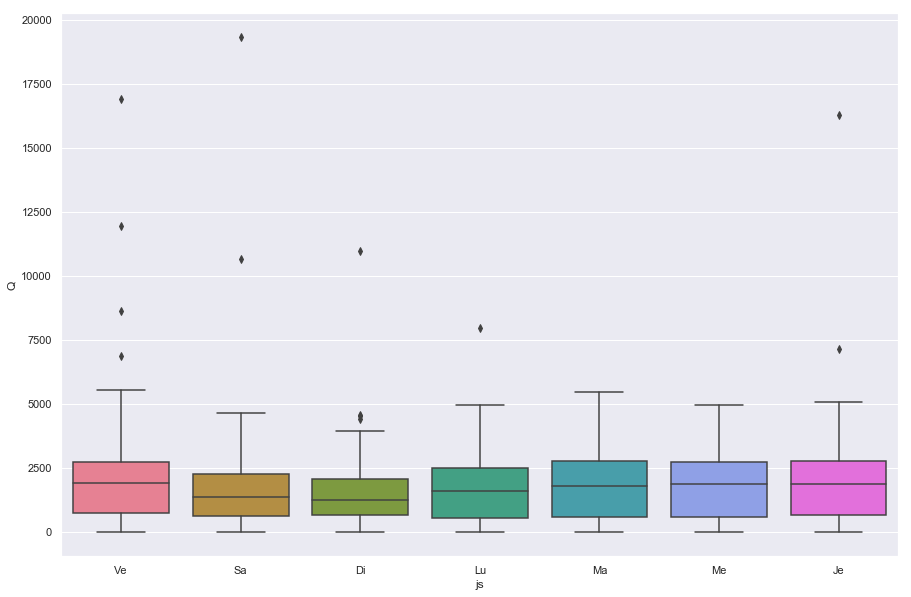

In [27]:
plt.figure(figsize=(15, 10))
sns.boxplot( x= 'js' , y='Q', data = M8k, palette = 'husl')

In [28]:
M8k.head()

,rgs,pr,m,js,jjmmaa,hhmm,Vitesse,To,Qualite,Q,A,Code
94489,811#M8k,277,278,Ve,01/01/2016,00:00,91.0,3.0,,850.0,811,M8k
94526,811#M8k,277,278,Ve,01/01/2016,01:00,86.0,3.0,,1039.0,811,M8k
94563,811#M8k,277,278,Ve,01/01/2016,02:00,85.0,5.0,,1389.0,811,M8k
94600,811#M8k,277,278,Ve,01/01/2016,03:00,87.0,3.0,,958.0,811,M8k
94637,811#M8k,277,278,Ve,01/01/2016,04:00,85.0,3.0,,986.0,811,M8k


In [29]:
### Débit horaire
selection = (M8k['Q'] <= 6000)
q = M8k[selection]
PRC(q)

0.2222716159146477

In [30]:
### Vitesse horaire
selection = (M8k['Vitesse'] <= 160)
v = M8k[selection]
PRC(v)

0.0

In [31]:
### To horaire
selection = (M8k['To'] <= 100)
t = M8k[selection]
PRC(t)

0.0

In [32]:
### Débit incompatibles
selection = (M8k['Q'] > 50)
qq = M8k[selection]
PRC(qq)

5.623471882640587

In [33]:
### Vitesse horaire
selection = (M8k['Vitesse'] > 5)
vv = M8k[selection]
PRC(vv)

2.8228495221160257

In [34]:
### To horaire
selection = (M8k['To'] > 0)
tt = M8k[selection]
PRC(tt)

11.913758613025117

##### Résultat :
La part des valeurs extremes sont les suivantes:

Débit horaire: **5,84%** ; Vitesse horaire: **2,82%** ; To horaire: **11,91%**.

| **Champs** | **D.extremes**   |
|------|------|
|   **Debit Q** | **5.84%**|
|------|------|
|   **Vitesse**  | **2.82%**|
|------|------|
|   **To**  | **11.91%**|

La table M8k après le nettoyage de données:

In [35]:
# Transformer les donnees a des dataframe
lst = [q,v,t,qq,vv,tt]
for i in lst :
    i = pd.DataFrame(i)

In [36]:
# Eliminer les valeurs aberrantes
inter1 = pd.merge(q, v, how='inner')
inter2 = pd.merge(t, qq, how='inner')
inter3 = pd.merge(vv, tt, how='inner')
inter4 = pd.merge(inter1, inter2, how='inner')
tab_M8k = pd.merge(inter3, inter4, how='inner')
tab_M8k.describe()

,pr,m,Vitesse,To,Q
count,3953.0,3953.0,3953.000000,3953.000000,3953.000000
mean,277.0,278.0,83.396914,7.988616,1876.162155
std,0.0,0.0,9.126726,5.888438,1084.863071
min,277.0,278.0,7.000000,1.000000,172.000000
25%,277.0,278.0,81.000000,3.000000,926.000000
50%,277.0,278.0,85.000000,7.000000,1837.000000
75%,277.0,278.0,88.000000,12.000000,2666.000000
max,277.0,278.0,101.000000,42.000000,5547.000000


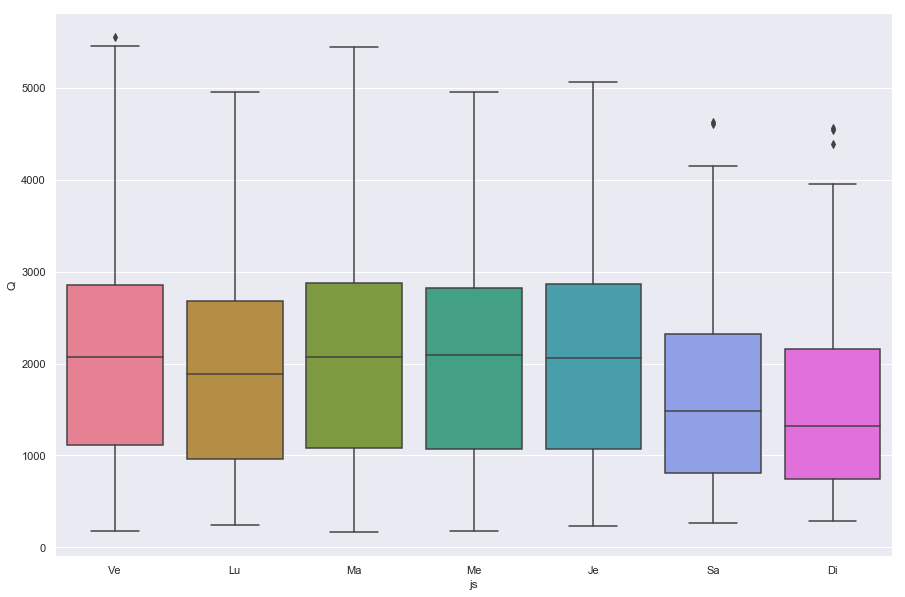

In [37]:
plt.figure(figsize=(15, 10)) 
sns.boxplot(x= 'js' , y='Q', data = tab_M8k, palette = 'husl')

# Analyse du diagramme fondamental

Nous avons vu plus haut les définitions d’un certain nombre de grandeurs relatives au trafic :

• Le débit Q (nombre de véhicules passant pendant une période de temps donnée en un point).

• La concentration C (nombre de véhicules présents à un instant sur une longueur de route donnée).

• La vitesse V (vitesse moyenne des véhicules présents à un instant sur une longueur de route donnée).

La mécanique des fluides nous enseigne que le débit est égal au produit de la concentration et de la
vitesse Q = C x V. La vitesse V est donc donnée par l’équation : V = Q/C.
Ces trois variables sont reliées par la relation Q = C x V.

Ce chapitre a pour objectif d’illustrer ces grandes notions en présentant les liens qui existent entre elles.

La concentration C est inversement proportionnelle à la vitesse, en effet, plus la vitesse est élevée plus la concentration est faible.

Cette relation prendra toute son importance dans le chapitre suivant.

## Les trois représentations du diagramme fondamental :

Nous avons rappelé que le débit et la concentration sont reliés, en chaque point du réseau et en chaque
instant, par la vitesse. On peut donc représenter la relation fondamentale de trois manières différentes :
- Q = f(C) / Q= f(To).
- V = f(C).
- V = f(Q).

Le débit maximal ou la capacité sera typiquement de 5 000 à 6 000 véh/h.

In [35]:
# Ajouter le champs de Concentration C
tab_M7i['C'] = (tab_M7i['Q'])/(tab_M7i['Vitesse'])
tab_M8k['C'] = (tab_M8k['Q'])/(tab_M8k['Vitesse'])

Lorsque la concentration est faible, on peut supposer que le débit qui passe en un point va croître de manière presque linéaire. Si les véhicules ne sont pas contraints, alors plus ils sont nombreux dans une zone située en amont d’un point donné (concentration), plus ils seront nombreux à passer dans les minutes suivantes en ce point (débit).

Ceci est vrai jusqu’à ce que le débit atteigne la capacité de la voie. À ce moment-là, en effet, il y a
une contrainte qui s’oppose à l’écoulement libre des véhicules.

Text(0.5, 0.98, 'Diagramme de niveau de service, Q=f(C) et Q=f(To) pour M7i')

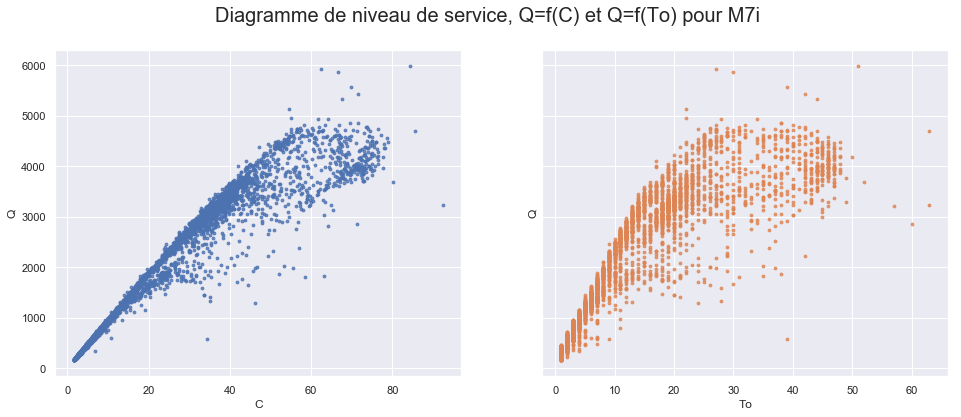

In [36]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6), sharey=True)
sns.regplot(x= tab_M7i['C'], y=tab_M7i['Q'], fit_reg=False, scatter_kws={'s':8}, ax=axs[0])
sns.regplot(x= tab_M7i['To'], y=tab_M7i['Q'], scatter_kws={'s':8}, fit_reg=False, ax=axs[1])
fig.suptitle("Diagramme de niveau de service, Q=f(C) et Q=f(To) pour M7i", fontsize=20)

Text(0.5, 0.98, 'Diagramme de niveau de service, Q=f(C) et Q=f(To) pour M8k')

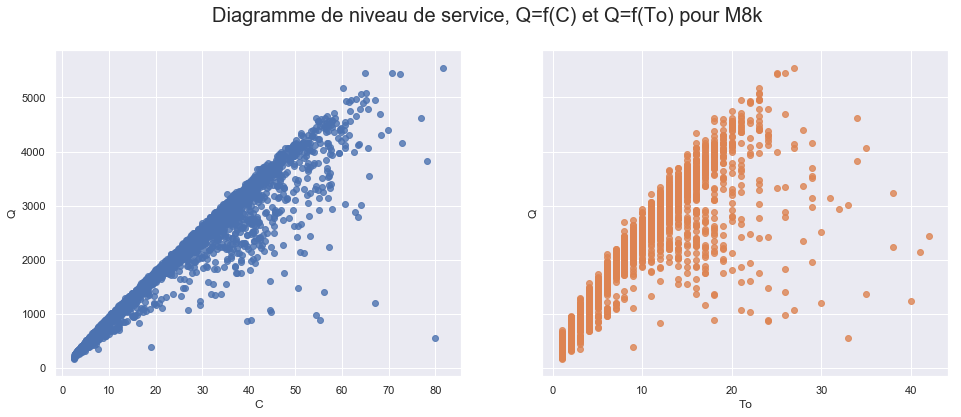

In [37]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6), sharey=True)
sns.regplot(x= tab_M8k['C'], y=tab_M8k['Q'], fit_reg=False, ax=axs[0])
sns.regplot(x= tab_M8k['To'], y=tab_M8k['Q'], fit_reg=False, ax=axs[1])
fig.suptitle("Diagramme de niveau de service, Q=f(C) et Q=f(To) pour M8k", fontsize=20)

**La concentration alors est liée au taux d’occupation To.**

**Et présenter le débit Q en fonction de la concentration C revient a le représenter par le taux d’occupation To.**

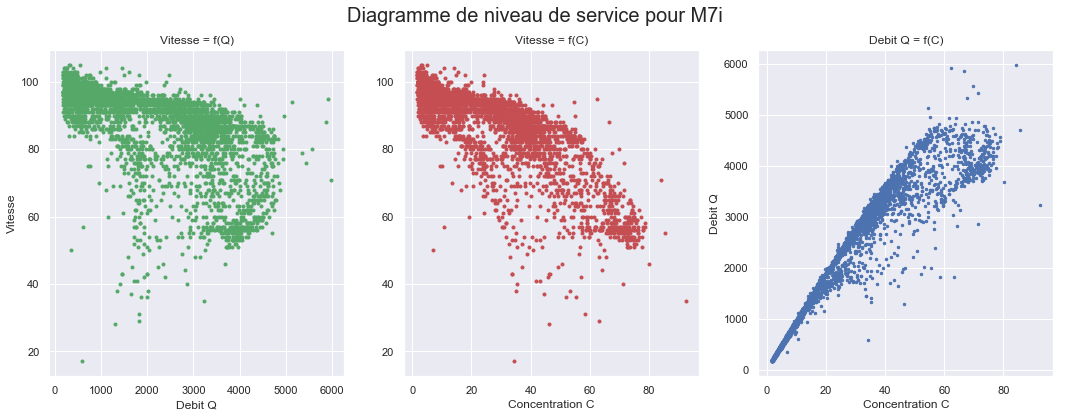

In [38]:
fig = plt.figure(figsize=(18,6))
#AXES
ax1 = fig.add_subplot(131); ax2 = fig.add_subplot(132); ax3 = fig.add_subplot(133)

#Data
ax1.scatter(tab_M7i['Q'], tab_M7i['Vitesse'], s=9, c='g', marker="o")
ax2.scatter(tab_M7i['C'], tab_M7i['Vitesse'], s=9, c='r', marker="o")
ax3.scatter(tab_M7i['C'], tab_M7i['Q'], s=6, c='b', marker="o")

#Labels
ax1.set_xlabel('Debit Q'); ax1.set_ylabel('Vitesse')
ax2.set_xlabel('Concentration C'); fig.suptitle("Diagramme de niveau de service pour M7i", fontsize=20)
ax3.set_xlabel('Concentration C'); ax3.set_ylabel('Debit Q')
ax3.set_title('Debit Q = f(C)'); ax2.set_title('Vitesse = f(C)'); ax1.set_title('Vitesse = f(Q)')
plt.show()

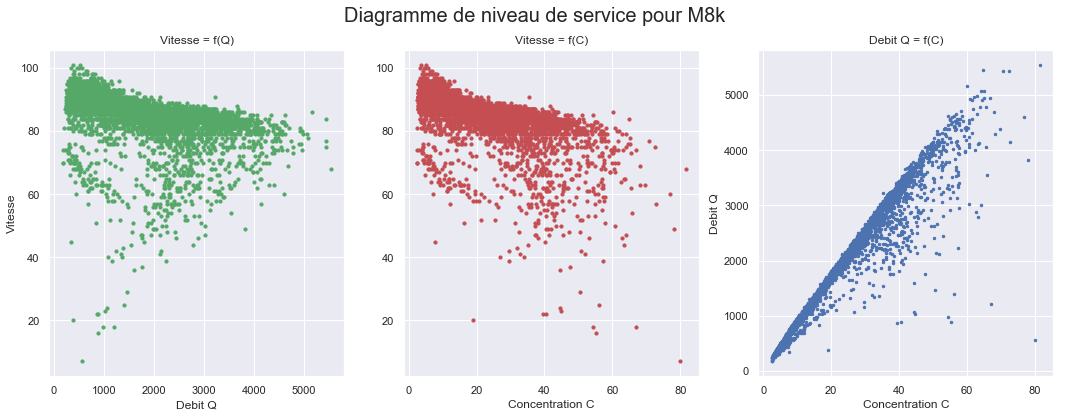

In [39]:
fig = plt.figure(figsize=(18,6))
#AXES
ax1 = fig.add_subplot(131); ax2 = fig.add_subplot(132); ax3 = fig.add_subplot(133)

#Data
ax1.scatter(tab_M8k['Q'], tab_M8k['Vitesse'], s=10, c='g', marker="o")
ax2.scatter(tab_M8k['C'], tab_M8k['Vitesse'], s=10, c='r', marker="o")
ax3.scatter(tab_M8k['C'], tab_M8k['Q'], s=6, c='b', marker="o")
#Labels
ax1.set_xlabel('Debit Q'); ax1.set_ylabel('Vitesse');fig.suptitle("Diagramme de niveau de service pour M8k", fontsize=20)
ax2.set_xlabel('Concentration C'); ax3.set_xlabel('Concentration C'); ax3.set_ylabel('Debit Q')
ax3.set_title('Debit Q = f(C)'); ax2.set_title('Vitesse = f(C)'); ax1.set_title('Vitesse = f(Q)')
plt.show()

Text(0.5, 1.0, 'Diagramme de niveaux de service Vitesse = f(Q) pour la station M7i')

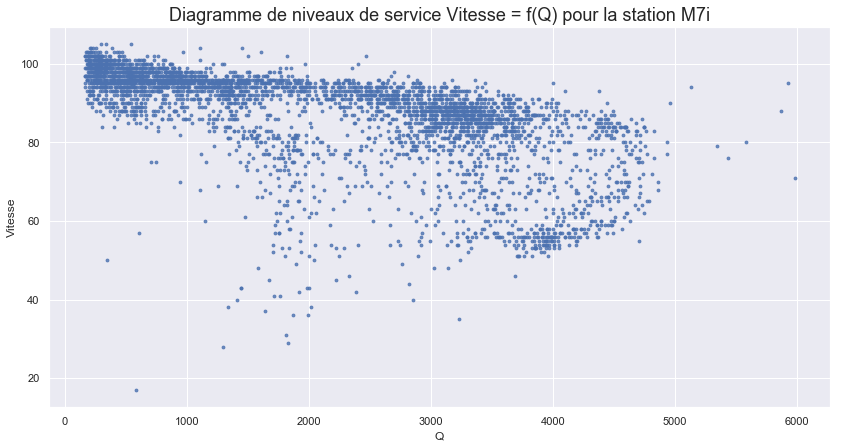

In [40]:
plt.figure(figsize=(14, 7))
sns.regplot(x= tab_M7i['Q'], y=tab_M7i['Vitesse'], scatter_kws={'s':8}, fit_reg=False)
plt.title('Diagramme de niveaux de service Vitesse = f(Q) pour la station M7i',fontsize = 18)

Text(0.5, 1.0, 'Diagramme de niveaux de service Vitesse = f(Q) pour la station M8k')

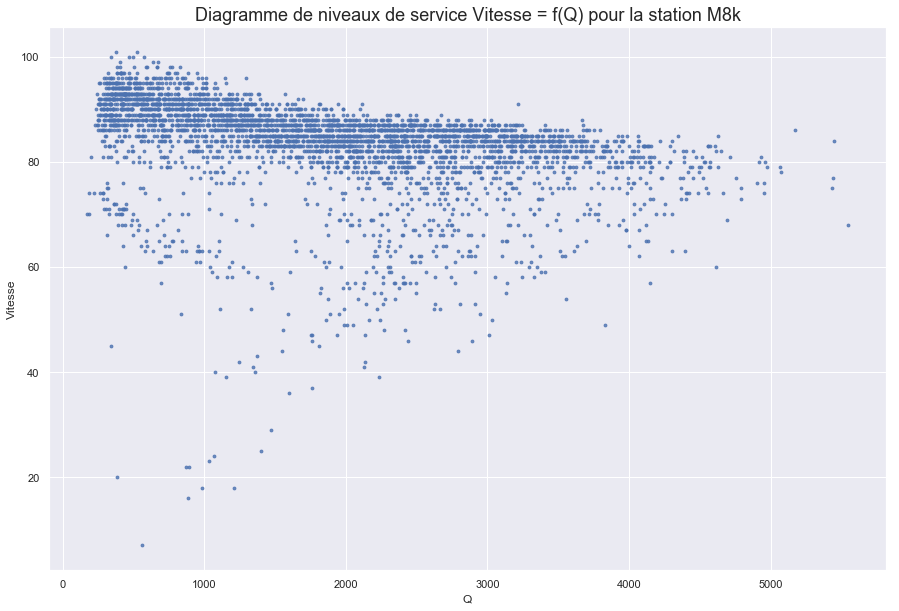

In [41]:
plt.figure(figsize=(15, 10))
sns.regplot(x= tab_M8k['Q'], y=tab_M8k['Vitesse'], scatter_kws={'s':8}, fit_reg=False)
plt.title('Diagramme de niveaux de service Vitesse = f(Q) pour la station M8k',fontsize = 18)

In [42]:
#Tables de donnees par jours
Lu_M7i = tab_M7i[tab_M7i['js'].str.startswith('Lu')]; Ma_M7i = tab_M7i[tab_M7i['js'].str.startswith('Ma')]
Me_M7i = tab_M7i[tab_M7i['js'].str.startswith('Me')]; je_M7i = tab_M7i[tab_M7i['js'].str.startswith('Je')]
Ve_M7i = tab_M7i[tab_M7i['js'].str.startswith('Ve')]
Mj_M7i = pd.concat([Ma_M7i, je_M7i])

/Users/mac/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


AttributeError: module 'seaborn' has no attribute 'plt'

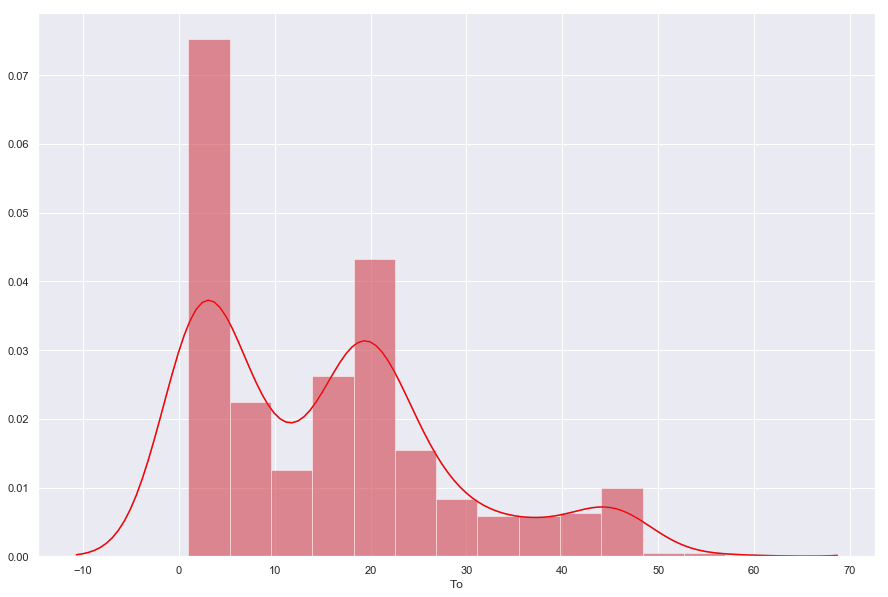

In [43]:
plt.figure(figsize=(15, 10)) 
sns.distplot( Ma_M7i["To"] , color="skyblue", label="Sepal Length")
sns.distplot( Ma_M7i["To"] , color="red", label="Sepal Width")
sns.plt.legend()


In [ ]:
plt.subplots(figsize=(14,7))
plt.bar(Ma_M7i['hhmm'],Ma_M7i['To'], width = .5)
plt.ylabel("Taux d'occupation", fontsize = 15) 
plt.xlabel('Heures', fontsize = 15) 
plt.title("Répartition horaire des niveaux de service sur un Mardi type pour M7i", fontsize = 20) 
plt.show()

In [ ]:
plt.subplots(figsize=(14,7))
plt.bar(je_M7i['hhmm'],je_M7i['To'], width = .5)
plt.ylabel("Taux d'occupation", fontsize = 15) 
plt.xlabel('Heures', fontsize = 15) 
plt.title("Répartition horaire des niveaux de service sur un Jeudi type pour M7i", fontsize = 20) 
plt.show()

In [60]:
#Tables de donnees par jours
Lu_M8k = tab_M8k[tab_M8k['js'].str.startswith('Lu')]; Ma_M8k = tab_M8k[tab_M8k['js'].str.startswith('Ma')]
Me_M8k = tab_M8k[tab_M8k['js'].str.startswith('Me')]; je_M8k = tab_M8k[tab_M8k['js'].str.startswith('Je')]
Ve_M8k = tab_M8k[tab_M7i['js'].str.startswith('Ve')]; Mj_M8k = pd.concat([Ma_M8k, je_M8k])

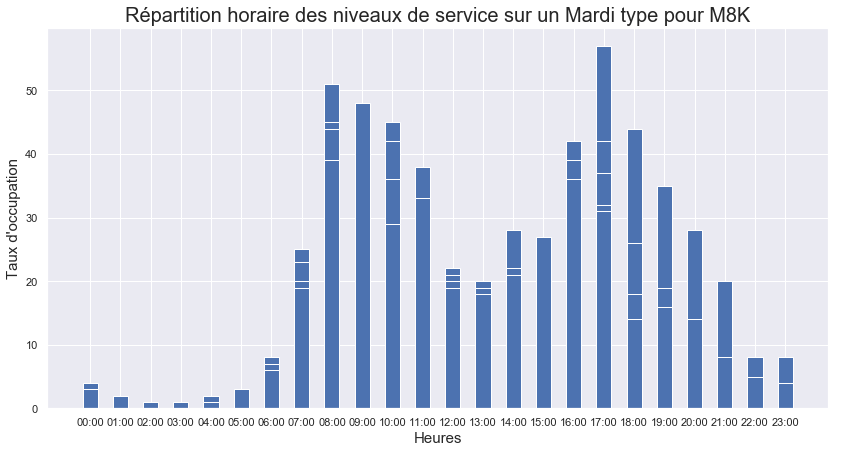

In [62]:
plt.subplots(figsize=(14,7))
plt.bar(Ma_M8k['hhmm'],Ma_M8k['To'], width = .5)
plt.ylabel("Taux d'occupation", fontsize = 15) 
plt.xlabel('Heures', fontsize = 15) 
plt.title("Répartition horaire des niveaux de service sur un Mardi type pour M8k", fontsize = 20) 
plt.show()

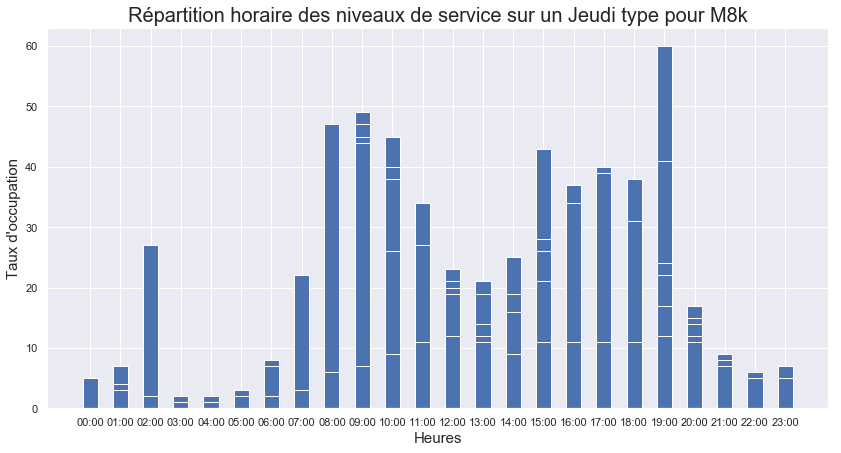

In [63]:
plt.subplots(figsize=(14,7))
plt.bar(je_M8k['hhmm'],je_M8k['To'], width = .5)
plt.ylabel("Taux d'occupation", fontsize = 15) 
plt.xlabel('Heures', fontsize = 15) 
plt.title("Répartition horaire des niveaux de service sur un Jeudi type pour M8k", fontsize = 20) 
plt.show()

## Evolution du trafic (du débit et de la vitesse) :


In [31]:
#La moyenne, les quantiles et le max des champs par heure pour Mardi.
MM7i_moy = Ma_M7i.groupby(['hhmm'], as_index=False).mean()
MM7i_Qu1 = Ma_M7i.groupby(['hhmm'], as_index=False).quantile(.25)
MM7i_Qu2 = Ma_M7i.groupby(['hhmm'], as_index=False).quantile(.50)
MM7i_Qu3 = Ma_M7i.groupby(['hhmm'], as_index=False).quantile(.75)
MM7i_max = Ma_M7i.groupby(['hhmm'], as_index=False).max() 

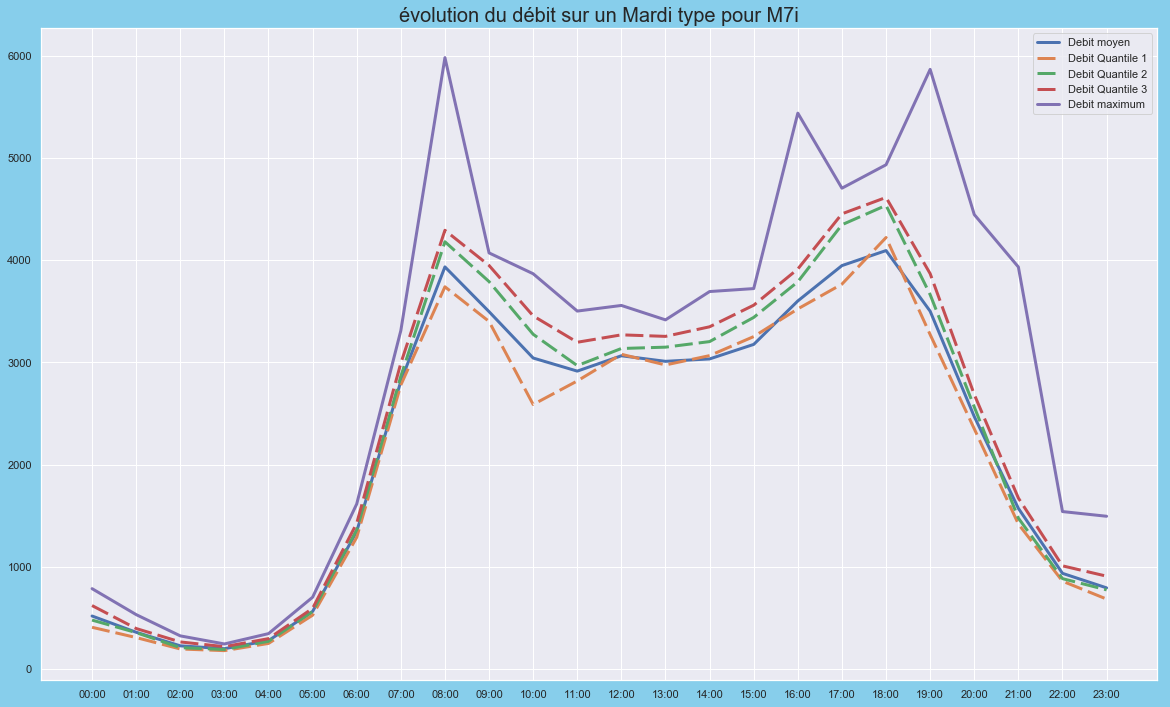

In [32]:
fig, ax = plt.subplots(figsize = (20,12), facecolor='skyblue')
plt.title("évolution du débit sur un Mardi type pour M7i", fontsize = 20)
line1, = ax.plot(MM7i_moy['hhmm'], MM7i_moy['Q'], linewidth=3, label='Debit moyen')
line2, = ax.plot(MM7i_moy['hhmm'],MM7i_Qu1['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 1')
line3, = ax.plot(MM7i_moy['hhmm'],MM7i_Qu2['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 2')
line4, = ax.plot(MM7i_moy['hhmm'],MM7i_Qu3['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 3')
line5, = ax.plot(MM7i_moy['hhmm'],MM7i_max['Q'],linewidth=3, label='Debit maximum')
ax.legend()
plt.show()


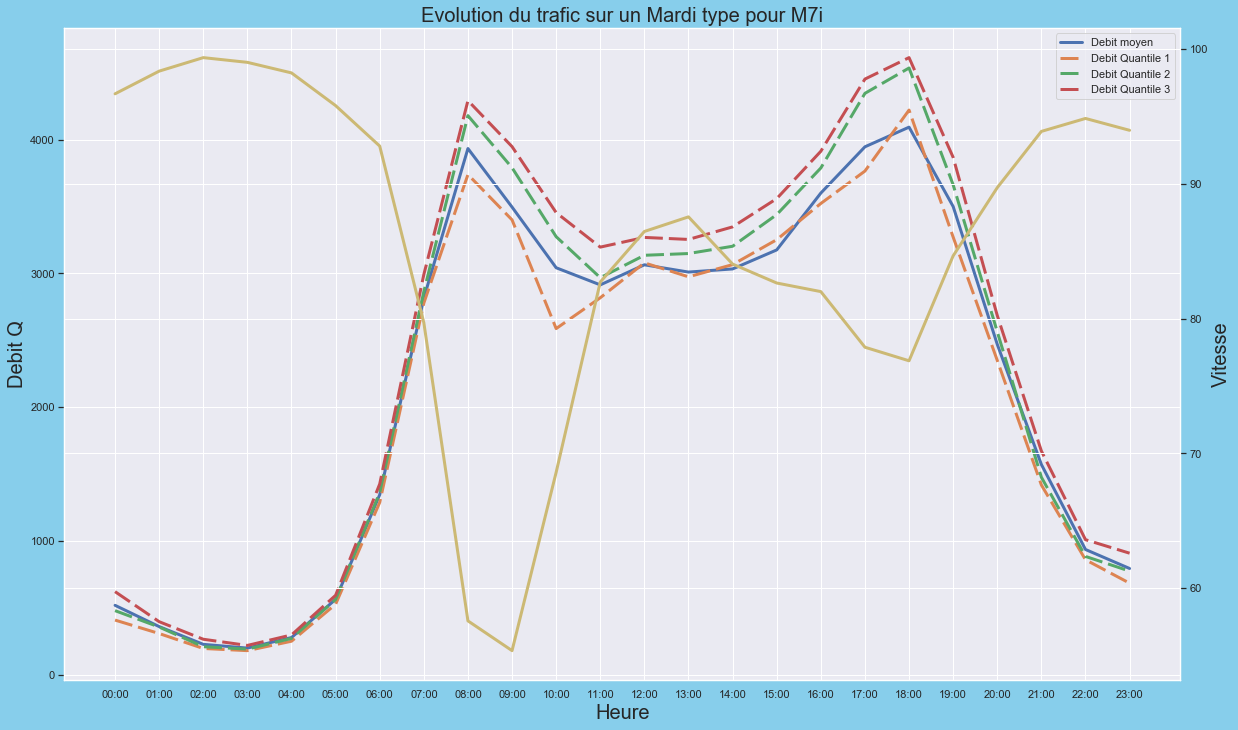

In [165]:
fig = plt.figure(figsize = (20,12), facecolor='skyblue')
ax1 = fig.add_subplot(111)
ax1.plot(MM7i_moy['hhmm'], MM7i_moy['Q'], linewidth=3, label='Debit moyen')
ax1.plot(MM7i_moy['hhmm'],MM7i_Qu1['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 1')
ax1.plot(MM7i_moy['hhmm'],MM7i_Qu2['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 2')
ax1.plot(MM7i_moy['hhmm'],MM7i_Qu3['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 3')
ax2 = ax1.twinx()
ax2.plot(MM7i_moy['hhmm'], MM7i_moy['Vitesse'], linewidth=3, color='y')
plt.title("Evolution du trafic sur un Mardi type pour M7i", fontsize = 20)
ax2.set_ylabel('Vitesse', fontsize = 20); ax1.set_xlabel('Heure', fontsize = 20); ax1.set_ylabel('Debit Q', fontsize = 20)
ax1.legend()

In [64]:
#La moyenne, les quantiles et le max des champs par heure pour Mardi.
MM8k_moy = Ma_M8k.groupby(['hhmm'], as_index=False).mean()
MM8k_Qu1 = Ma_M8k.groupby(['hhmm'], as_index=False).quantile(.25)
MM8k_Qu2 = Ma_M8k.groupby(['hhmm'], as_index=False).quantile(.50)
MM8k_Qu3 = Ma_M8k.groupby(['hhmm'], as_index=False).quantile(.75)
MM8k_max = Ma_M8k.groupby(['hhmm'], as_index=False).max()

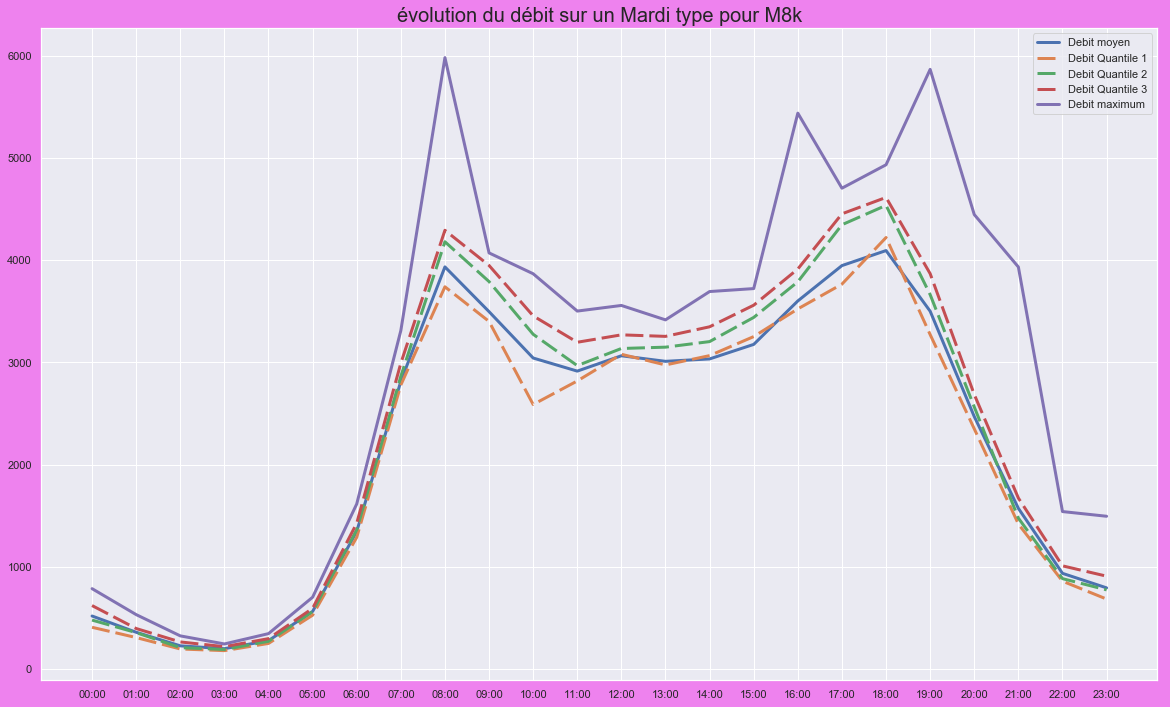

In [66]:
fig, ax = plt.subplots(figsize = (20,12), facecolor='violet')
plt.title("évolution du débit sur un Mardi type pour M8k", fontsize = 20)
line1, = ax.plot(MM8k_moy['hhmm'], MM8k_moy['Q'], linewidth=3, label='Debit moyen')
line2, = ax.plot(MM8k_moy['hhmm'],MM8k_Qu1['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 1')
line3, = ax.plot(MM8k_moy['hhmm'],MM8k_Qu2['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 2')
line4, = ax.plot(MM8k_moy['hhmm'],MM8k_Qu3['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 3')
line5, = ax.plot(MM8k_moy['hhmm'],MM8k_max['Q'],linewidth=3, label='Debit maximum')
ax.legend()
plt.show()


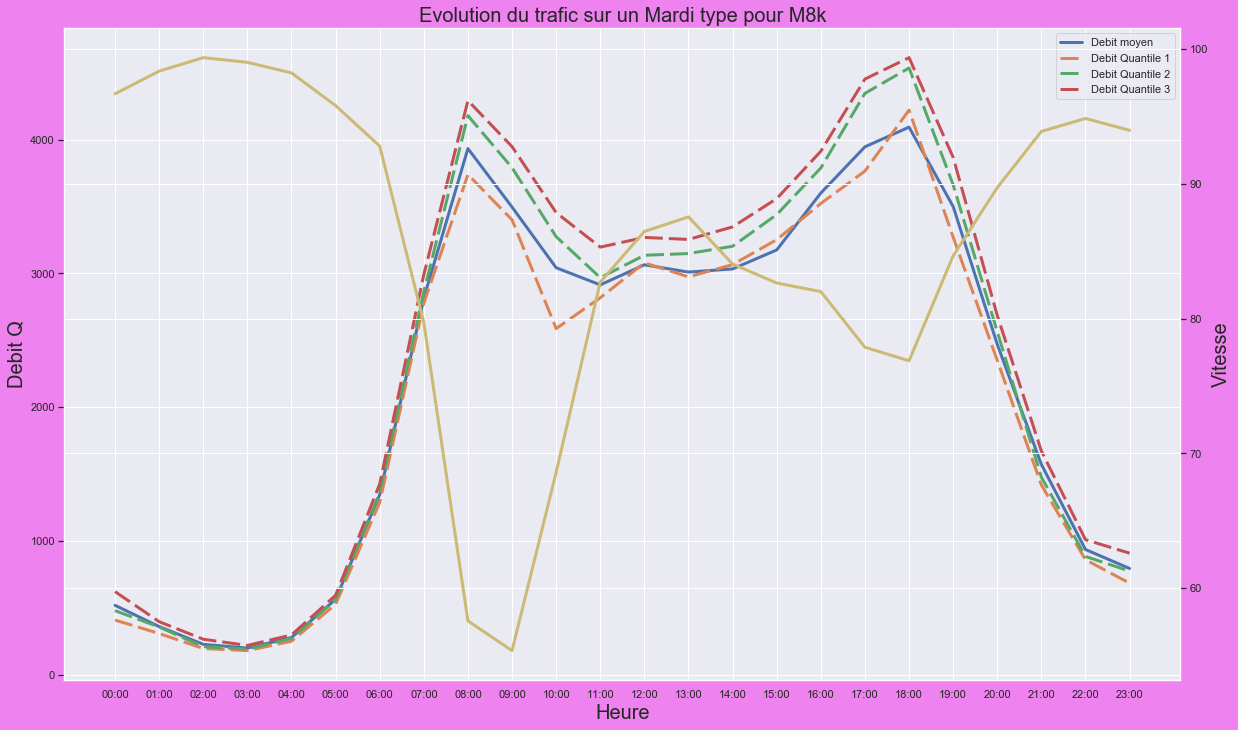

In [67]:
fig = plt.figure(figsize = (20,12), facecolor='violet')
ax1 = fig.add_subplot(111)
ax1.plot(MM8k_moy['hhmm'], MM8k_moy['Q'], linewidth=3, label='Debit moyen')
ax1.plot(MM8k_moy['hhmm'],MM8k_Qu1['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 1')
ax1.plot(MM8k_moy['hhmm'],MM8k_Qu2['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 2')
ax1.plot(MM8k_moy['hhmm'],MM8k_Qu3['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 3')
ax2 = ax1.twinx()
ax2.plot(MM8k_moy['hhmm'], MM8k_moy['Vitesse'], linewidth=3, color='y')
plt.title("Evolution du trafic sur un Mardi type pour M8k", fontsize = 20)
ax2.set_ylabel('Vitesse', fontsize = 20); ax1.set_xlabel('Heure', fontsize = 20); ax1.set_ylabel('Debit Q', fontsize = 20)
ax1.legend()

In [68]:
#La moyenne, les quantiles et le max des champs par heure pour Mardi et jeudi.
MjM7i_moy = Mj_M7i.groupby(['hhmm'], as_index=False).mean()
MjM7i_Qu1 = Mj_M7i.groupby(['hhmm'], as_index=False).quantile(.25)
MjM7i_Qu2 = Mj_M7i.groupby(['hhmm'], as_index=False).quantile(.50)
MjM7i_Qu3 = Mj_M7i.groupby(['hhmm'], as_index=False).quantile(.75)
MjM7i_max = Mj_M7i.groupby(['hhmm'], as_index=False).max(); MjM7i_moy.head()

,hhmm,pr,m,Vitesse,To,Q,C
0,00:00,264,687,96.369565,2.391304,596.260870,6.213843
1,01:00,264,687,97.755556,1.711111,423.866667,4.408131
2,02:00,264,687,98.878049,1.707317,392.585366,4.045375
3,03:00,264,687,99.090909,1.030303,215.696970,2.181795
4,04:00,264,687,98.195652,1.086957,273.217391,2.781026


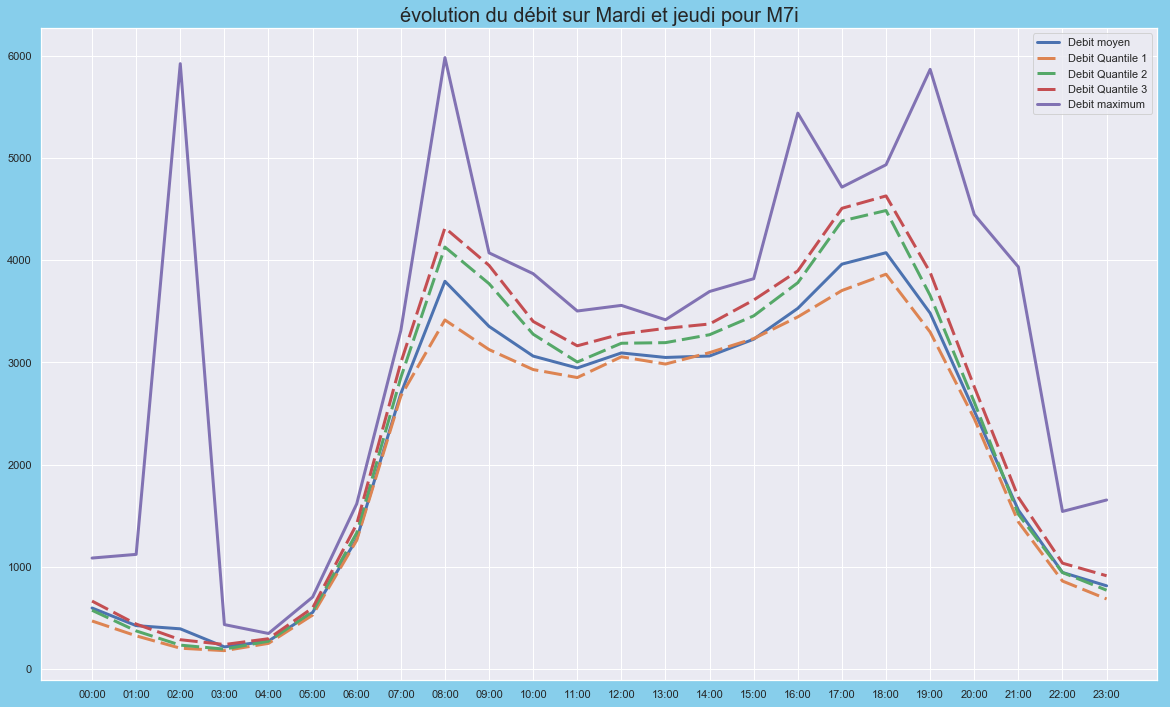

In [34]:
fig, ax = plt.subplots(figsize = (20,12), facecolor='skyblue')
plt.title("évolution du débit sur Mardi et jeudi pour M7i", fontsize = 20)
line1, = ax.plot(MjM7i_moy['hhmm'], MjM7i_moy['Q'], linewidth=3, label='Debit moyen')
line2, = ax.plot(MjM7i_moy['hhmm'],MjM7i_Qu1['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 1')
line3, = ax.plot(MjM7i_moy['hhmm'],MjM7i_Qu2['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 2')
line4, = ax.plot(MjM7i_moy['hhmm'],MjM7i_Qu3['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 3')
line5, = ax.plot(MjM7i_moy['hhmm'],MjM7i_max['Q'],linewidth=3, label='Debit maximum')
ax.legend()
plt.show()

In [69]:
#La moyenne, les quantiles et le max des champs par heure pour Mardi et jeudi.
MjM8k_moy = Mj_M8k.groupby(['hhmm'], as_index=False).mean()
MjM8k_Qu1 = Mj_M8k.groupby(['hhmm'], as_index=False).quantile(.25)
MjM8k_Qu2 = Mj_M8k.groupby(['hhmm'], as_index=False).quantile(.50)
MjM8k_Qu3 = Mj_M8k.groupby(['hhmm'], as_index=False).quantile(.75)
MjM8k_max = Mj_M8k.groupby(['hhmm'], as_index=False).max(); MjM8k_moy.head()

,hhmm,pr,m,Vitesse,To,Q,C
0,00:00,264,687,96.369565,2.391304,596.260870,6.213843
1,01:00,264,687,97.755556,1.711111,423.866667,4.408131
2,02:00,264,687,98.878049,1.707317,392.585366,4.045375
3,03:00,264,687,99.090909,1.030303,215.696970,2.181795
4,04:00,264,687,98.195652,1.086957,273.217391,2.781026


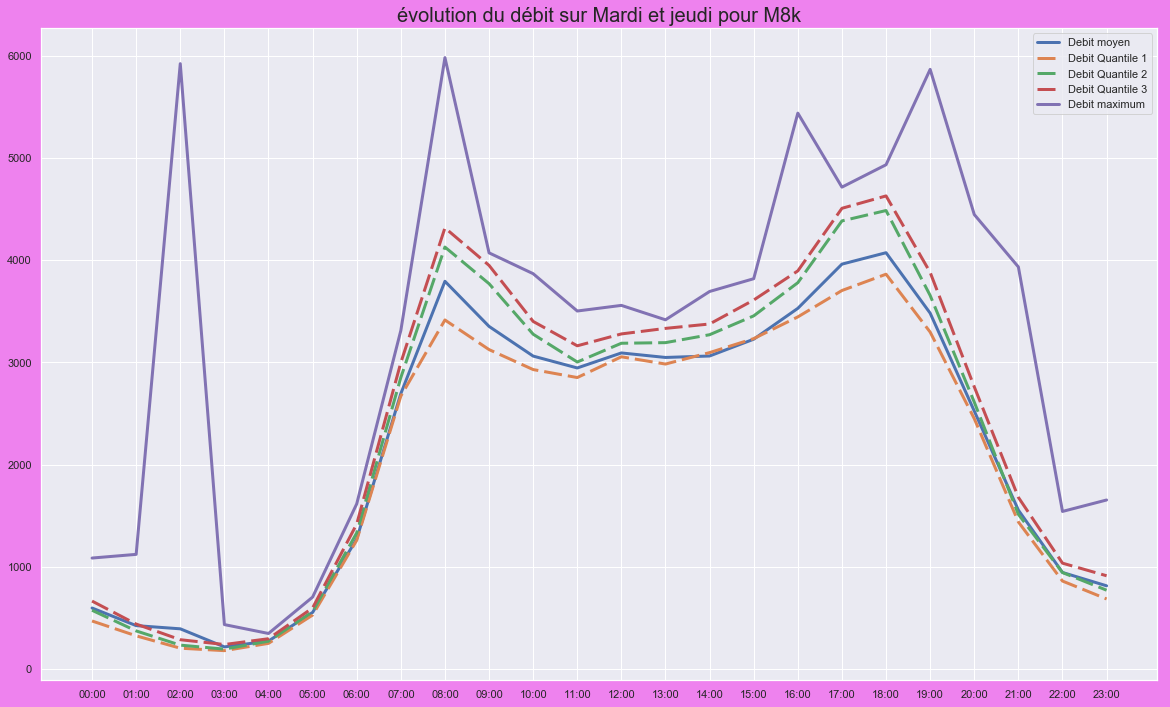

In [70]:
fig, ax = plt.subplots(figsize = (20,12), facecolor='violet')
plt.title("évolution du débit sur Mardi et jeudi pour M8k", fontsize = 20)
line1, = ax.plot(MjM8k_moy['hhmm'],MjM8k_moy['Q'], linewidth=3, label='Debit moyen')
line2, = ax.plot(MjM8k_moy['hhmm'],MjM8k_Qu1['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 1')
line3, = ax.plot(MjM8k_moy['hhmm'],MjM8k_Qu2['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 2')
line4, = ax.plot(MjM8k_moy['hhmm'],MjM8k_Qu3['Q'], dashes=[6, 2],linewidth=3, label='Debit Quantile 3')
line5, = ax.plot(MjM8k_moy['hhmm'],MjM8k_max['Q'],linewidth=3, label='Debit maximum')
ax.legend()
plt.show()

In [36]:
# La moyenne des champs par heure.
jM7i_moy = je_M7i.groupby(['hhmm'], as_index=False).mean()
MeM7i_moy = Me_M7i.groupby(['hhmm'], as_index=False).mean()
LM7i_moy = Lu_M7i.groupby(['hhmm'], as_index=False).mean()
VM7i_moy = Ve_M7i.groupby(['hhmm'], as_index=False).mean()

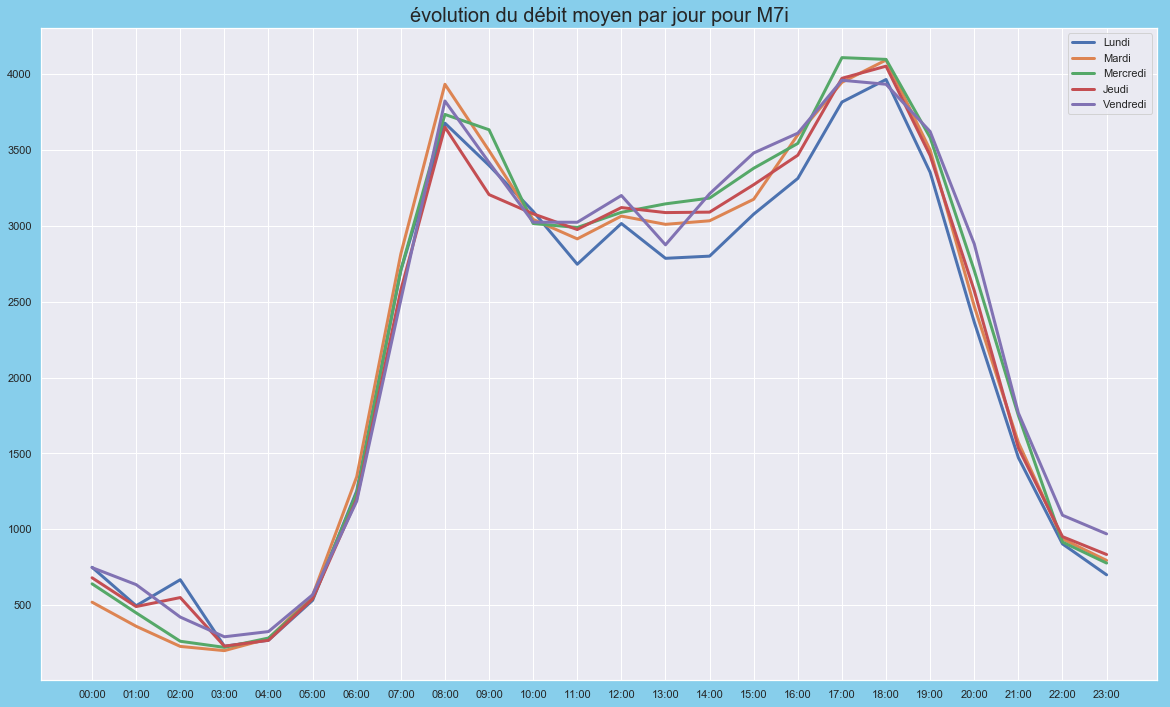

In [37]:
fig, ax = plt.subplots(figsize = (20,12), facecolor='skyblue')
plt.title("évolution du débit moyen par jour pour M7i", fontsize = 20)
line1, = ax.plot(jM7i_moy['hhmm'], LM7i_moy['Q'], linewidth=3, label='Lundi')
line2, = ax.plot(jM7i_moy['hhmm'], MM7i_moy['Q'], linewidth=3, label='Mardi')
line3, = ax.plot(jM7i_moy['hhmm'], MeM7i_moy['Q'], linewidth=3, label='Mercredi')
line4, = ax.plot(jM7i_moy['hhmm'],jM7i_moy['Q'],linewidth=3, label='Jeudi')
line5, = ax.plot(jM7i_moy['hhmm'],VM7i_moy['Q'],linewidth=3, label='Vendredi')
ax.legend()
plt.show()
# hada je vais l'enregistrer et n7eydou men hna

In [72]:
# La moyenne des champs par heure.
jM8k_moy = je_M8k.groupby(['hhmm'], as_index=False).mean()
MeM8k_moy = Me_M8k.groupby(['hhmm'], as_index=False).mean()
LM8k_moy = Lu_M8k.groupby(['hhmm'], as_index=False).mean()
VM8k_moy = Ve_M8k.groupby(['hhmm'], as_index=False).mean()

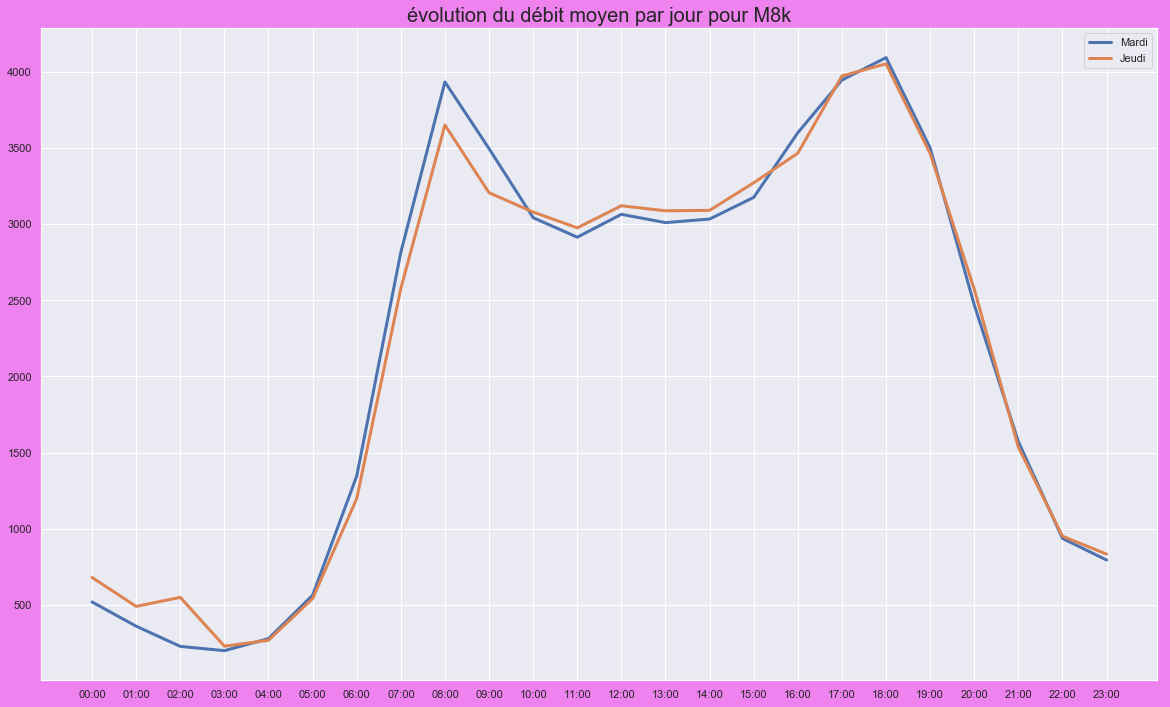

In [73]:
fig, ax = plt.subplots(figsize = (20,12), facecolor='violet')
plt.title("évolution du débit moyen par jour pour M8k", fontsize = 20)
line2, = ax.plot(jM8k_moy['hhmm'], MM8k_moy['Q'], linewidth=3, label='Mardi')
line4, = ax.plot(jM8k_moy['hhmm'],jM8k_moy['Q'],linewidth=3, label='Jeudi')
ax.legend()
plt.show()

# Organisation de données de comptages agrégées à 6 mn :
## Création de la table de données de l’année 2016 :

Comme pour les données agrégées à l'heure, Nous nous organiserons les tables jour à fin d’avoir une table ‘dataframe’ contenant les données de toutes les autoroutes de l’aire métropole Aix-Marseille-Provence en concaténant les données, qui sont représentées sous forme plusieurs tables.

Voici le lien vers les tables de données de janvier jusqu'à Mai 2016, et aussi la table entière sous le nom 'tab16_6m' :


In [102]:
#Importation de la table
table_2016 = pd.read_csv("tab16.csv", sep = ',')
#Lire la table en dataframe
tab16 = pd.DataFrame(table_2016)
tab16.head(20)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,453#M4C,13,380,Ve,01/01/16,00:00,20,240,0,0,...,94,0,0,0,0,NaN,0,1,,NaN
1,454#M4D,13,810,Ve,01/01/16,00:00,20,240,0,0,...,90,0,0,0,0,NaN,0,0,,NaN
2,455#M4E,14,360,Ve,01/01/16,00:00,20,170,0,0,...,86,0,0,0,0,NaN,0,0,,NaN
3,456#M4F,14,845,Ve,01/01/16,00:00,0,0,0,0,...,0,0,0,0,0,NaN,0,0,,NaN
4,457#M4G,15,373,Ve,01/01/16,00:00,0,0,0,0,...,0,0,0,0,0,NaN,0,0,,NaN
5,403#M4c,13,380,Ve,01/01/16,00:00,20,90,0,0,...,84,0,0,0,0,NaN,0,0,,NaN
6,404#M4d,13,810,Ve,01/01/16,00:00,30,100,0,0,...,92,0,0,0,0,NaN,0,0,,NaN
7,405#M4e,14,360,Ve,01/01/16,00:00,0,110,0,0,...,89,0,0,0,0,NaN,0,0,,NaN
8,406#M4f,14,845,Ve,01/01/16,00:00,0,0,0,0,...,0,0,0,0,0,NaN,0,0,,NaN
9,407#M4g,15,373,Ve,01/01/16,00:00,0,0,0,0,...,0,0,0,0,0,NaN,0,0,,NaN


 Avant de commencer le traitement de données nous allons faire quelques modifications sur la table a fin de faciliter les taches. Pour cela nous garderons que les champs utiles pour cette étude :
 
- **rgs :** Code du PME , exemple : 453#M4C.
- **pr :** Point de Repère kilométrique.
- **js :** Jour de la semaine (Lu, Ma, Me, Je, Ve, Sa, Di).
- **jjmmaa :** date formatée (jour mois année ) exemple : 25/12/01.
- **hhmm :**  heure et minute.
- **Qi :** débit moyen  6 minutes par classe de véhicules (i=1 à 6).
- **Vi :** vitesse moyenne 6 minutes en km/h par classe de véhicules (i=1 à 6).
- **To :** Taux d'occupation 6 minutes.


In [74]:
# J'ai copié la table pour la modifier et garder la table initiale
t16 = tab16.copy()
tab16.columns = ['rgs', 'pr', 'm', 'js', 'jma', 'hhmm', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', '_', 'V1'
                 , 'V2', 'V3', 'V4', 'V5', 'V6', '__', 'Accident','To', 'Qualite', '___']
t16['Q'] = tab16['Q1'] + tab16['Q2'] +tab16['Q3'] +tab16['Q4'] +tab16['Q5'] +tab16['Q6']
lst = ['Q1','Q2','Q3','Q4','Q5','Q6','_','__','___', 'Accident', 'Qualite']
tab6 = t16.drop(lst, 1,errors='ignore')
tab6.head()

,rgs,pr,m,js,jma,hhmm,V1,V2,V3,V4,V5,V6,To,Q
0,453#M4C,13,380,Ve,01/01/16,00:00,79,94,0,0,0,0,1,260
1,454#M4D,13,810,Ve,01/01/16,00:00,99,90,0,0,0,0,0,260
2,455#M4E,14,360,Ve,01/01/16,00:00,113,86,0,0,0,0,0,190
3,456#M4F,14,845,Ve,01/01/16,00:00,0,0,0,0,0,0,0,0
4,457#M4G,15,373,Ve,01/01/16,00:00,0,0,0,0,0,0,0,0


In [ ]:
Pourquoi faire ca

In [111]:
tab6m = tab6.copy()
tab6m['Vitesse'] = tab6['V2']
lst = ['V1','V2','V3','V4','V5','V6']
t6m = tab6m.drop(lst, 1,errors='ignore')
t6m.head(30)

,rgs,pr,m,js,jma,hhmm,To,Q,Vitesse
0,453#M4C,13,380,Ve,01/01/16,00:00,1,260,94
1,454#M4D,13,810,Ve,01/01/16,00:00,0,260,90
2,455#M4E,14,360,Ve,01/01/16,00:00,0,190,86
3,456#M4F,14,845,Ve,01/01/16,00:00,0,0,0
4,457#M4G,15,373,Ve,01/01/16,00:00,0,0,0
5,403#M4c,13,380,Ve,01/01/16,00:00,0,110,84
6,404#M4d,13,810,Ve,01/01/16,00:00,0,130,92
7,405#M4e,14,360,Ve,01/01/16,00:00,0,110,89
8,406#M4f,14,845,Ve,01/01/16,00:00,0,0,0
9,407#M4g,15,373,Ve,01/01/16,00:00,0,0,0


### Les données de trafic sur l'autoroute A7 :
Le code de toutes les stations dans l'autoroute A7 commence par 'M7' et 'M8', donc nous gardons dans la table 'df' ques les stations de A7.

In [106]:
#On separe la colonne rgs pour pouvoir lire le code de la station
#Cela aide a utiliser la fonction startswith
t6m['A'], t6m['Code'] = t6m['rgs'].str.split('#', 1).str
t6m.head()

,rgs,pr,m,js,jma,hhmm,To,Q,Vitesse,A,Code
0,453#M4C,13,380,Ve,01/01/16,00:00,1,260,94,453,M4C
1,454#M4D,13,810,Ve,01/01/16,00:00,0,260,90,454,M4D
2,455#M4E,14,360,Ve,01/01/16,00:00,0,190,86,455,M4E
3,456#M4F,14,845,Ve,01/01/16,00:00,0,0,0,456,M4F
4,457#M4G,15,373,Ve,01/01/16,00:00,0,0,0,457,M4G


In [107]:
#Selectionner les codes qui commence par M7 et M8
df1 = t6m[t6m['Code'].str.startswith('M8')]
df2 = t6m[t6m['Code'].str.startswith('M7')]
#Concatener les deux tables
df3 = pd.concat([df2,df1],axis = 0,ignore_index = True)
df3.head()

,rgs,pr,m,js,jma,hhmm,To,Q,Vitesse,A,Code
0,759#M7I,264,687,Ve,01/01/16,00:00,1,340,95,759,M7I
1,760#M7J,265,320,Ve,01/01/16,00:00,3,360,103,760,M7J
2,709#M7i,264,687,Ve,01/01/16,00:00,2,510,99,709,M7i
3,710#M7j,265,320,Ve,01/01/16,00:00,1,290,97,710,M7j
4,764#M7N,267,230,Ve,01/01/16,00:00,0,0,0,764,M7N


Voici le lien vers la table A7 sous le nom de table_A7_2016 : https://drive.google.com/drive/folders/1Z3MFMvPBtjWzgTjDra2VNLwL7u262uYx

Pour exporter la table il suffit d'exécuter la commande suivante :

# Qualification des données

## Les données manquantes  :
Les données qualifiées « manquantes » correspondent aux données non
présentes ou « vides ». Dès qu’une des 3 valeurs (Q, V ou TO) est manquante, la mesure
complète est considérée manquante, et dans cet échantillon on en a aucune:

In [80]:
df3.isnull().any()

rgs        False
pr         False
m          False
js         False
jma        False
hhmm       False
To         False
Q          False
Vitesse    False
A          False
Code       False
dtype: bool

## Valeur aberrante et nulle :
**Valeurs extrêmes :**

- Le test de sur-comptage est effectué en comparant chaque débit mesuré à un seuil de débit : à priori **300 véh./6 minutes/voie**. 
- Le test de sur-vitesse est effectué en comparant chaque vitesse mesurée à une vitesse limite : à priori **160 km/h**.

**Valeurs nulles:**

- Le test de débit nul est effectué en comparant le nombre de pas de temps successifs où le débit de la station est égal à zéro à un nombre de pas maximum : à priori 3 pas de 6 minutes, soit 18 minutes sans donnée.
- Le test de vitesse nulle est effectué en comparant le nombre de pas successifs où la vitesse de la station est égale à zéro à un nombre de pas maximum : à priori 3 pas)

**Utilisation de graphiques pour identifier des valeurs aberrantes :**
 
Nous pouvons aussi trouver les derniers résultats des sur-comptage et sur-vitesse en identifiant les valeurs aberrantes par des graphes :
Sur les nuages de points, les points très éloignés des autres sont de possibles valeurs aberrantes. 
En effectuant la commande suivant, on obtient un graphe de nuage :

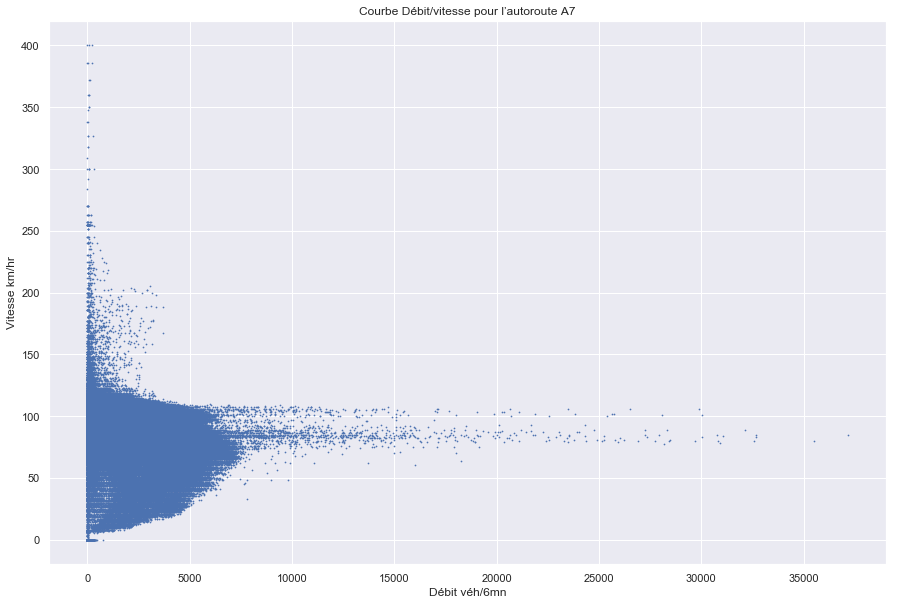

In [81]:
plt.figure(figsize=(15,10))
plt.scatter(df3.Q, df3.Vitesse, s =.5)
plt.title('Courbe Débit/vitesse pour l’autoroute A7')
plt.xlabel('Débit véh/6mn')
plt.ylabel('Vitesse km/hr')
plt.show()

? A refaire ?Ce nuage de points met en évidence des valeurs aberrantes, les points très éloignés des autres sont supérieur 
que 6000 pour le débit et 150 pour la vitesse.
 
En général, les valeurs aberrantes sont plus faciles à repérer sur une boîte à moustaches. Elles sont des valeurs de données très éloignées des autres valeurs de données, et peuvent avoir une incidence importante sur vos résultats.

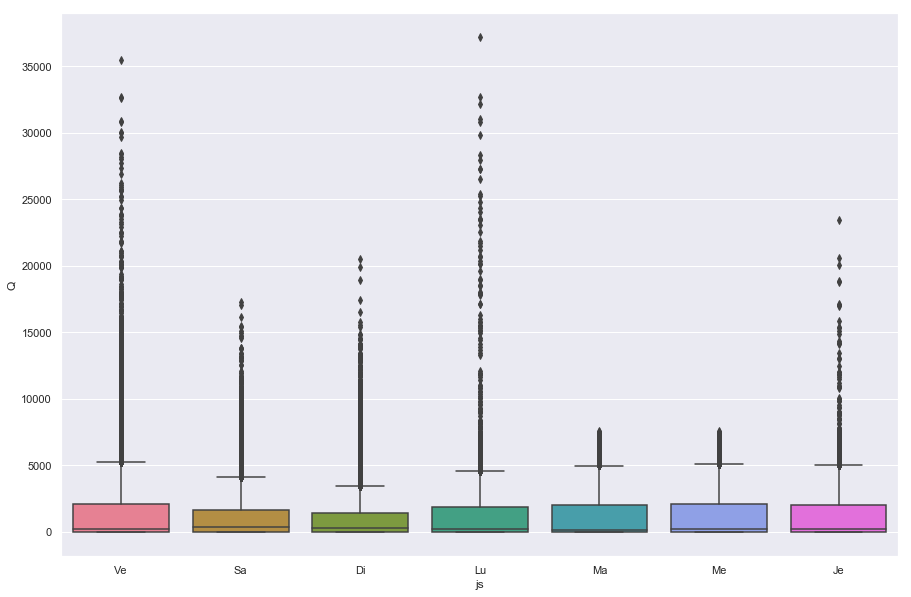

In [82]:
plt.figure(figsize=(15, 10))
sns.boxplot(x= 'js' , y='Q', data = df3, palette = 'husl')

Pour la suite nous allons traiter les données aberrantes de chaques stations, et pour cela on commence par les identifier.

In [119]:
#Identifier les donnees de chaque stations
groupe = df3.groupby('Code')

### Point de mesures : 709#M7i

In [120]:
#Table de donnees de la station M7i
M7i = groupe.get_group('M7i')
#transformer la table en dataframe
M7i = pd.DataFrame(M7i)
M7i.describe()

,pr,m,To,Q,Vitesse
count,33969.0,33969.0,33969.000000,33969.000000,33969.000000
mean,264.0,687.0,13.247991,2129.926403,88.252730
std,0.0,0.0,12.917661,1456.929604,16.011282
min,264.0,687.0,0.000000,0.000000,0.000000
25%,264.0,687.0,3.000000,680.000000,87.000000
50%,264.0,687.0,10.000000,2210.000000,93.000000
75%,264.0,687.0,20.000000,3390.000000,97.000000
max,264.0,687.0,93.000000,6870.000000,161.000000


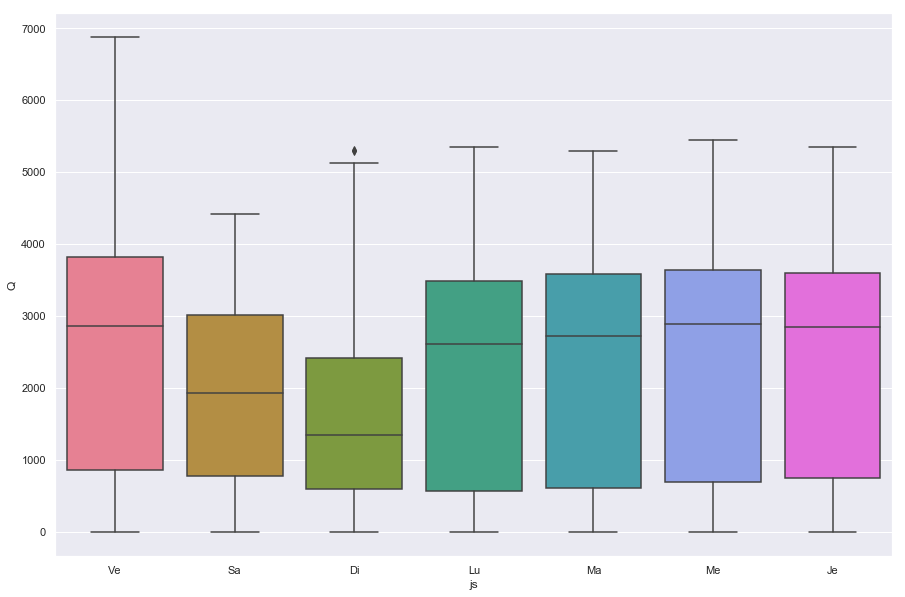

In [88]:
plt.figure(figsize=(15, 10))
sns.boxplot( x= 'js' , y='Q', data = M7i, palette = 'husl')

La valeur centrale du graphique est la médiane. La médiane est la valeur de la distribution qui sépare les observations en deux sous-échantillons de même taille. On remarque que les données sont asymétriques, la majorité d'entre elles sont situées sur le côté inférieur du graphique, et comme indique le tableu de description ci-dessus la médiane est 2210 veh/mn.

Les largeurs des deux parties de la boîte rendent compte de la dispersion des valeurs situées au centre de l’échantillon (la boîte contient 50% (environ) de l'ensemble des observations : 25% la partie inférieure et 25% la partie supérieure).

Les valeurs à l’extérieur des moustaches sont représentées par des points, qui sont des valeurs de données très éloignées des autres valeurs de données, peuvent être des valeurs aberrantes. En général, les valeurs aberrantes sont plus faciles à repérer sur une boîte à moustaches elles sont indiquées par des astérisques (*). Et on voit bien qu'il y a un seul point de ce type.

Par la suite nous allons calculer la part données des qui depassent le seuil.

In [109]:
### Débit horaire
selection = (M7i['Q'] <= 6000)
q = M7i[selection]
PRC(q)

0.0058877211575259795

In [90]:
### Vitesse horaire
selection = (M7i['Vitesse'] <= 160)
v = M7i[selection]
PRC(v) 

0.0029438605787629898

In [ ]:
je dois changer les seuils

In [ ]:
liste = M7i['Q']
d = {}
for i in liste
 if i == 0 & i+1 ==0 & i+2 == 0:
        
        #M7i[M7i.Q != i]
        #M7i.drop(M7i.index[[i,i+1,i+2]])

In [125]:
### Débit et TO incompatibles
selection =  (M7i['Q'] > 5)
qq = M7i[selection]
PRC(qq)

1.3924460537548942

In [128]:
### Vitesse horaire
selection = (M7i['Vitesse'] > 0)
vv = M7i[selection]
PRC(vv)

1.418940798963761

In [126]:
### To horaire
selection = (M7i['To'] > 0)
tt = M7i[selection]
PRC(tt)

4.604197945185316

##### Résultat :
La part des valeurs extrêmes sont les suivantes:


| **Champs** | **D.extremes**   |
|------|------|
|   **Debit Q** | **1.40%**|
|------|------|
|   **Vitesse**  | **1.42%**|
|------|------|
|   **To**  | **4.60%**|

In [129]:
# Transformer les donnees a des dataframe
lst = [q,v,t,qq,vv,tt]
for i in lst :
    i = pd.DataFrame(i)


# Eliminer les valeurs aberrantes
inter1 = pd.merge(q, v, how='inner')
inter2 = pd.merge(t, qq, how='inner')
inter3 = pd.merge(vv, tt, how='inner')
inter4 = pd.merge(inter1, inter2, how='inner')
tab_M7i = pd.merge(inter3, inter4, how='inner')
tab_M7i.describe()

,pr,m,To,Q,Vitesse,C
count,32464.0,32464.0,32464.00000,32464.000000,32464.000000,32464.000000
mean,264.0,687.0,13.89188,2228.636028,89.211403,27.414584
std,0.0,0.0,12.86605,1418.481790,12.057385,20.653469
min,264.0,687.0,1.00000,40.000000,6.000000,0.869565
25%,264.0,687.0,3.00000,790.000000,87.000000,8.181818
50%,264.0,687.0,11.00000,2420.000000,93.000000,26.105263
75%,264.0,687.0,20.00000,3430.000000,97.000000,40.117647
max,264.0,687.0,93.00000,5490.000000,118.000000,139.285714


# Analyse du diagramme fondamental

Nous avons vu plus haut les définitions d’un certain nombre de grandeurs relatives au trafic et auussi de la concentration C (nombre de véhicules présents à un instant sur une longueur de route donnée).

Pour ajouter la concentration nous servons de l’équation suivante : C = Q/V.
Ces trois variables sont reliées par la relation Q = C x V.

La concentration C est inversement proportionnelle à la vitesse, en effet, plus la vitesse est élevée plus la concentration est faible.

In [130]:
# Ajouter le champs de Concentration C
tab_M7i['C'] = (tab_M7i['Q'])/(tab_M7i['Vitesse'])

Text(0.5, 0.98, 'Diagramme de niveau de service, Q=f(C) et Q=f(To) pour M7i')

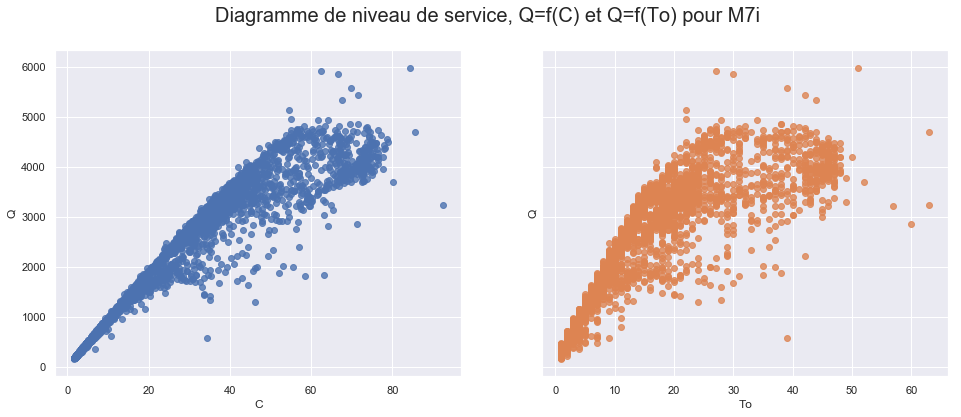

In [131]:
fig, axs = plt.subplots(ncols=2, figsize=(16,6), sharey=True)
sns.regplot(x= tab_M7i['C'], y=tab_M7i['Q'], fit_reg=False, ax=axs[0])
sns.regplot(x= tab_M7i['To'], y=tab_M7i['Q'], fit_reg=False, ax=axs[1])
fig.suptitle("Diagramme de niveau de service, Q=f(C) et Q=f(To) pour M7i", fontsize=20)

**La concentration alors est liée au taux d’occupation To.**

**Et présenter le débit Q en fonction de la concentration C revient a le représenter par le taux d’occupation To.**

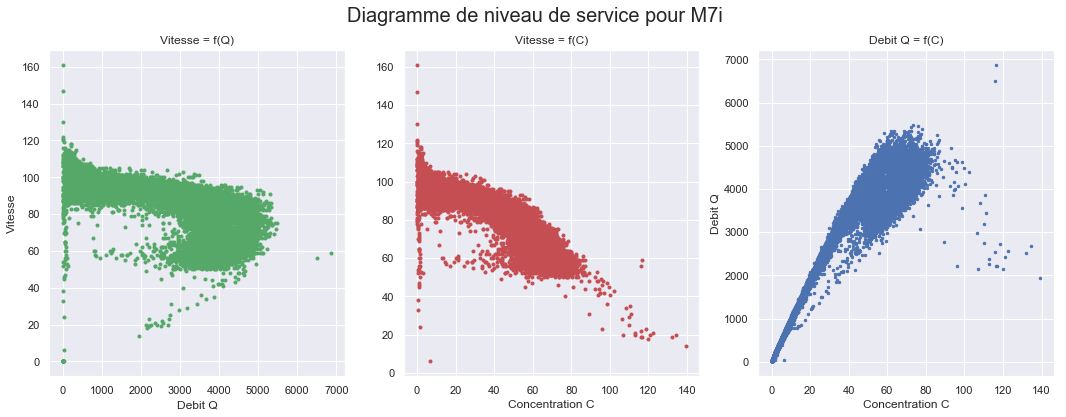

In [123]:
fig = plt.figure(figsize=(18,6))
#AXES
ax1 = fig.add_subplot(131); ax2 = fig.add_subplot(132); ax3 = fig.add_subplot(133)

#Data
ax1.scatter(M7i['Q'], M7i['Vitesse'], s=9, c='g', marker="o")
ax2.scatter(M7i['C'], M7i['Vitesse'], s=9, c='r', marker="o")
ax3.scatter(M7i['C'], M7i['Q'], s=6, c='b', marker="o")

#Labels
ax1.set_xlabel('Debit Q'); ax1.set_ylabel('Vitesse')
ax2.set_xlabel('Concentration C'); fig.suptitle("Diagramme de niveau de service pour M7i", fontsize=20)
ax3.set_xlabel('Concentration C'); ax3.set_ylabel('Debit Q')
ax3.set_title('Debit Q = f(C)'); ax2.set_title('Vitesse = f(C)'); ax1.set_title('Vitesse = f(Q)')
plt.show()

Text(0.5, 1.0, 'Diagramme de niveaux de service Vitesse = f(Q) pour la station M7i')

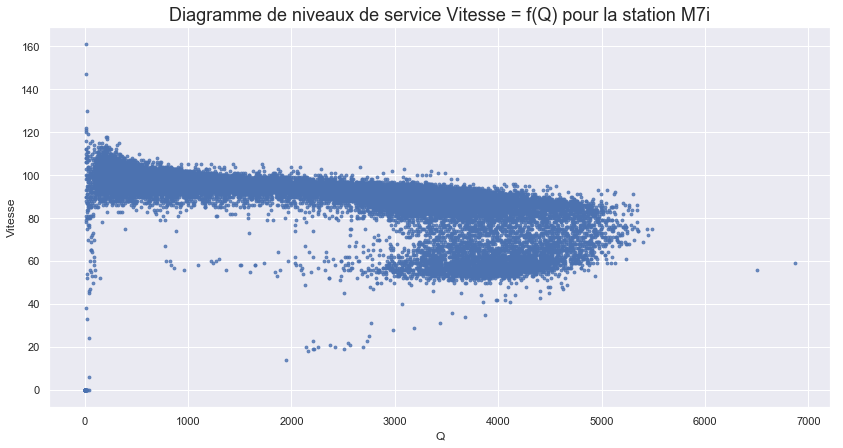

In [124]:
plt.figure(figsize=(14, 7))
sns.regplot(x= M7i['Q'], y=M7i['Vitesse'], scatter_kws={'s':8}, fit_reg=False)
plt.title('Diagramme de niveaux de service Vitesse = f(Q) pour la station M7i',fontsize = 18)